# Runner Notebook

## Exporting to HTML

In [1]:
import sys; sys.path.append(".")

%reload_ext autoreload
%autoreload 2

# import os
# os.system('jupyter nbconvert --to html runner.ipynb')

## Loading the game

In [2]:
from src.ChessGame import ChessGame 

game = ChessGame('data/1.pgn', game_number=14)

+-------------+--------------------------+
| Game number | 14                       |
| Round       | 4.2                      |
| White       | Nepomniachtchi,I 2758ELO |
| Black       | Vidit,S 2727ELO          |
| Result      | 1-0                      |
+-------------+--------------------------+


## Evaluating a single move

In [3]:
move = game.get_nth_move(33, display_board=False, print_evaluation=True, get_chatgpt_comment=False)
move

Move #33 for WHITE: e4f6
Evaluation for WHITE: -33
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      | 0         |         | 0.375    | 0.125    | -0.25  |
| king_centrality                  |         | 1        | 1        | 0         |         | 1        | 1        |  0     |
| king_attackers_looking_at_ring_1 |         | 0        | 0        | 0         |         | 0        | 0.125    |  0.125 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 | 0         |         | 0.333333 | 0.333333 |  0     |
| checked                          |         | 0        | 0        | 0         |         | 0   

Move.from_uci('e4f6')

Move #3 for WHITE: g1f3


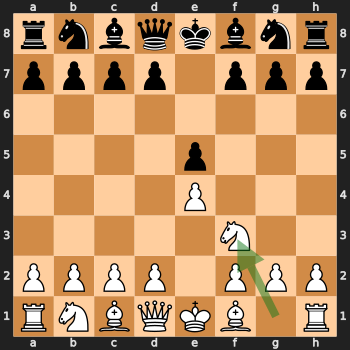

Legal move: g2g4, score: +118
Legal move: f2f3, score: +75
Legal move: g1h3, score: +60
Legal move: b1a3, score: +59
Legal move: h2h4, score: +38
Legal move: f2f4, score: +29
Legal move: b2b4, score: +21
Legal move: h2h3, score: +8
Legal move: a2a4, score: +8
Legal move: a2a3, score: +7
Legal move: b2b3, score: +6
Legal move: d2d3, score: +2
Legal move: b1c3, score: -4
Legal move: c2c3, score: -10
Legal move: e2e3, score: -13
Legal move: c2c4, score: -22
Legal move: g2g3, score: -23
Legal move: d2d4, score: -26
Legal move: e2e4, score: -31
Legal move: g1f3, score: -34


'!!'

In [8]:
from src.utils.move_analyser import MoveAnalyser

ma = MoveAnalyser()
move = game.get_nth_move(3, display_board=True, print_evaluation=False, get_chatgpt_comment=False)

ma.analyse_move(game, move)

In [40]:
import chess.engine
import chess.pgn
import sys

#Read pgn file:
with open("data/1.pgn") as f:
    game = chess.pgn.read_game(f)

#Go to the end of the game and create a chess.Board() from it:
game = game.end()
board = game.board()

#So if you want, here's also your PGN to FEN conversion:
print('FEN of the last position of the game: '), board.fen()

#or if you want to loop over all game nodes:
#while not game.is_end():
    #node = game.variations[0]
    #board = game.board() #print the board if you want, to make sure
    #game = node         

#Now we have our board ready, load your engine:
handler = chess.engine.InfoHandler()
engine = chess.uci.popen_engine('...\stockfish_8_x64') #give correct address of your engine here
engine.info_handlers.append(handler)

#give your position to the engine:
engine.position(board)

#Set your evaluation time, in ms:
evaltime = 5000 #so 5 seconds
evaluation = engine.go(movetime=evaltime)

#print best move, evaluation and mainline:
print('best move: ', board.san(evaluation[0]))
print('evaluation value: ', handler.info["score"][1].cp/100.0)
print('Corresponding line: ', board.variation_san(handler.info["pv"][1]))

FEN of the last position of the game: 


AttributeError: module 'chess.engine' has no attribute 'InfoHandler'

## Simulating the game

Move #1 for WHITE: e2e4


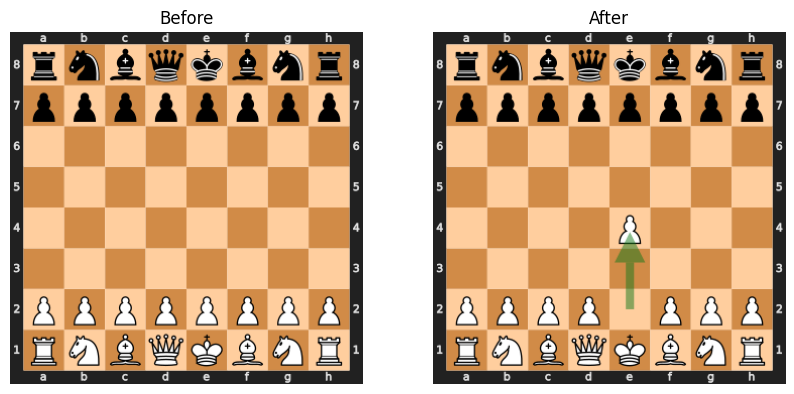

Evaluation for WHITE: -17
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0        | 0.125    |  0.125    |         | 0        | 0        |      0 |
| king_centrality                  |         | 1        | 1        |  0        |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0        |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.833333 | 0.666667 | -0.166667 |         | 0.833333 | 0.833333 |      0 |
| checked                          |         | 0        | 0        |  0        |         | 0        | 0        |      0 

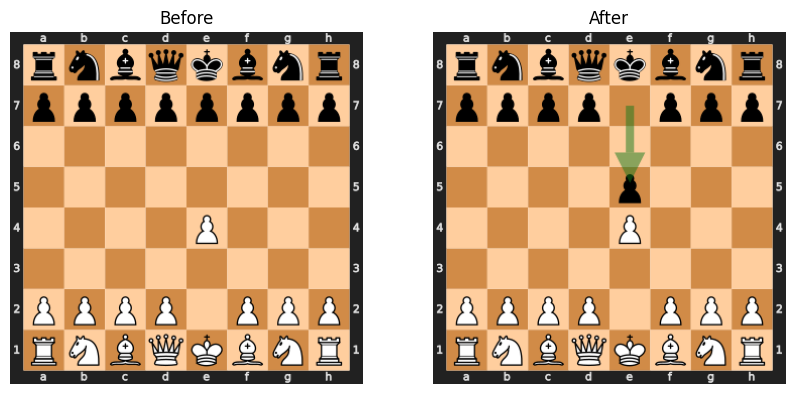

Evaluation for BLACK: +18
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.125    | 0.125    |  0     |         | 0        | 0.125    |  0.125    |
| king_centrality                  |         | 1        | 1        |  0     |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0     |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0     |         | 0.833333 | 0.666667 | -0.166667 |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0        

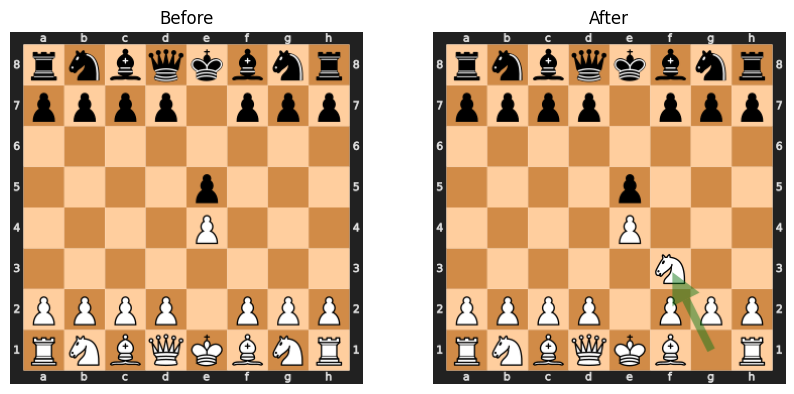

Evaluation for WHITE: -29
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.125    | 0.125    |  0        |         | 0.125    | 0.125    |      0 |
| king_centrality                  |         | 1        | 1        |  0        |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0        |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0        |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |  0        |         | 0        | 0        |      0 

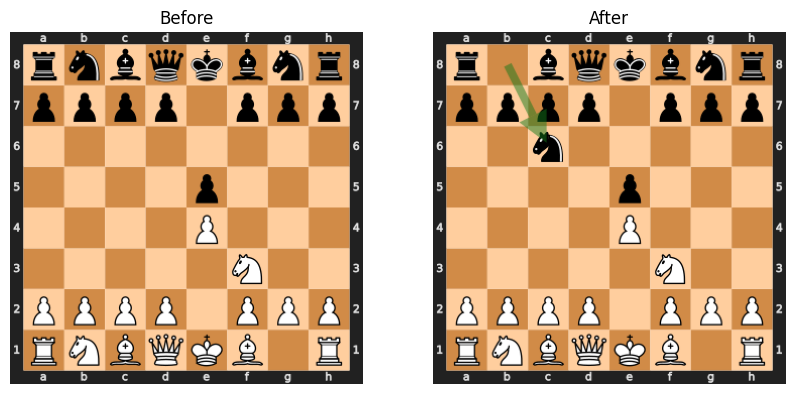

Evaluation for BLACK: +27
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |     Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+==========+
| king_mobility                    |         | 0.125    | 0.125    |      0 |         | 0.125    | 0.125    | 0        |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        | 0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0        | 0        |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 | 0        |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        | 0        |
| cast

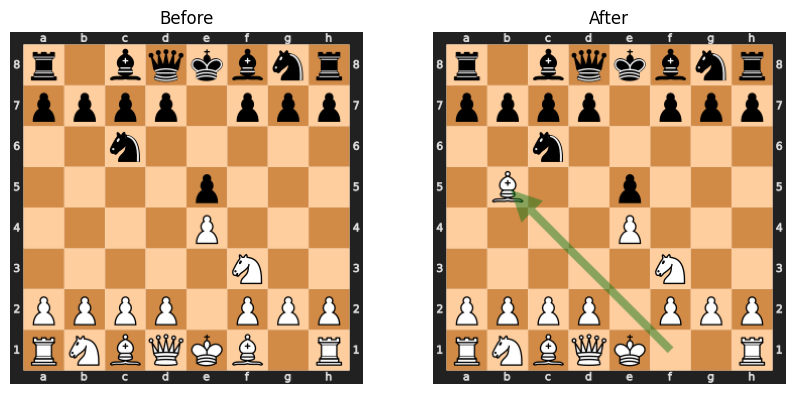

Evaluation for WHITE: -35
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.125    | 0.375    |  0.25      |         | 0.125    | 0.125    |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.5      | -0.166667  |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

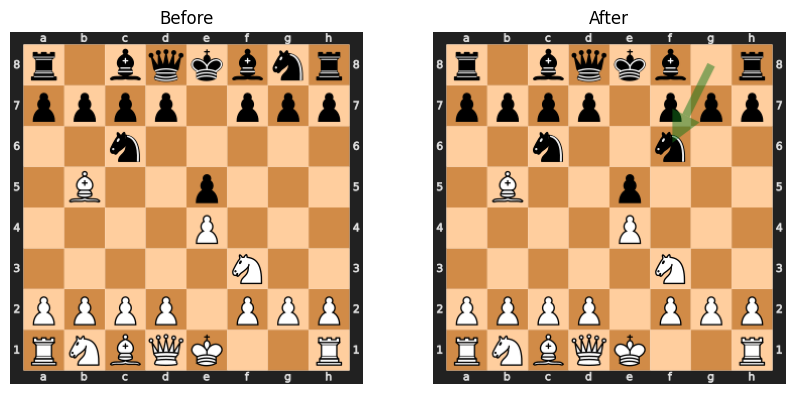

Evaluation for BLACK: +23
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.375    | 0.375    |      0 |         | 0.125    | 0.125    |  0        |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.5      | 0.5      |      0 |         | 0.666667 | 0.666667 |  0        |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0        

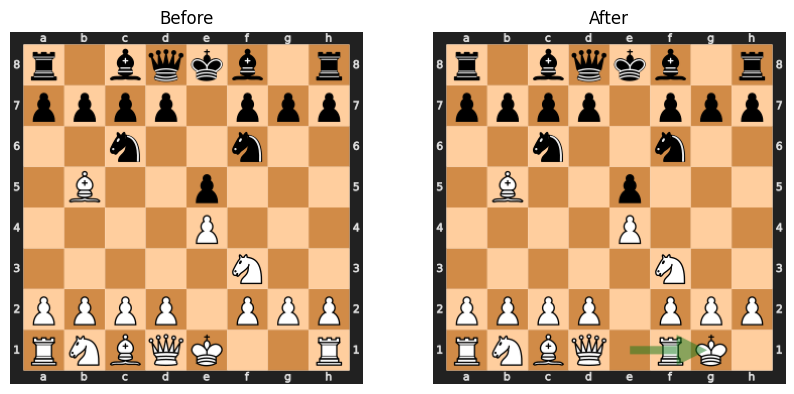

Evaluation for WHITE: -23
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.375    | 0.125    | -0.25      |         | 0.125    | 0.125    |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.5      | 0.666667 |  0.166667  |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

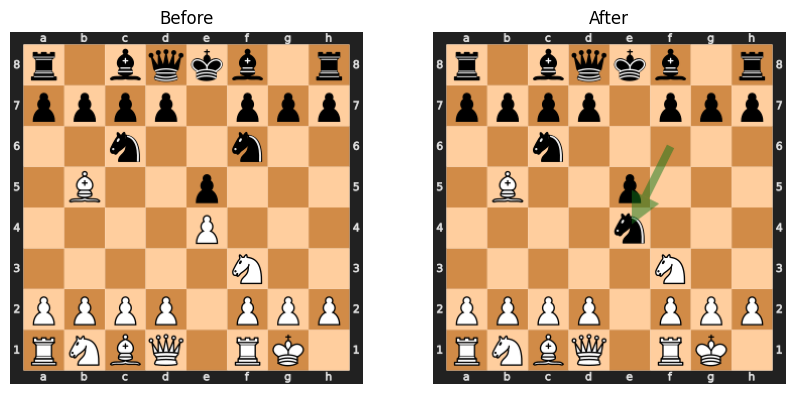

Evaluation for BLACK: +25
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+===========+
| king_mobility                    |         | 0.125    | 0.125    |  0        |         | 0.125    | 0.125    |  0        |
| king_centrality                  |         | 1        | 1        |  0        |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0.125    |  0.125    |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0        |         | 0.666667 | 0.666667 |  0        |
| checked                          |         | 0        | 0        |  0        |         | 0       

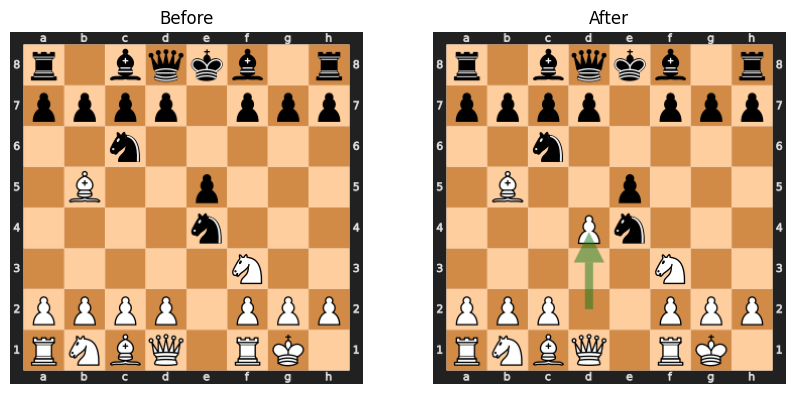

Evaluation for WHITE: -16
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.125    | 0.125    |  0         |         | 0.125    | 0.125    |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

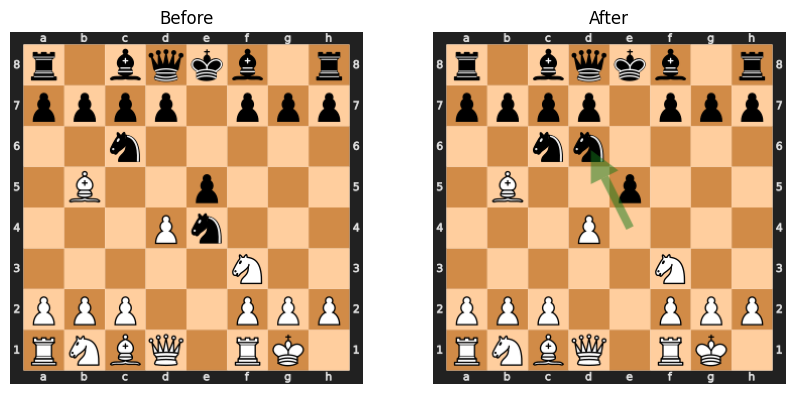

Evaluation for BLACK: +14
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |     Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+==========+
| king_mobility                    |         | 0.125    | 0.125    |  0     |         | 0.125    | 0.125    | 0        |
| king_centrality                  |         | 1        | 1        |  0     |         | 1        | 1        | 0        |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0        | -0.125 |         | 0        | 0        | 0        |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0     |         | 0.666667 | 0.666667 | 0        |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        | 0        |
| cast

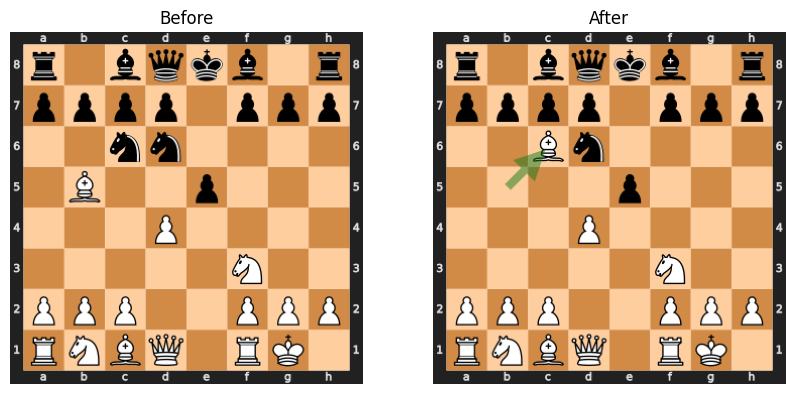

Evaluation for WHITE: -20
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.125    | 0.125    |      0 |         | 0.125    | 0.125    |  0        |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0.125    |  0.125    |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |  0        |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0        

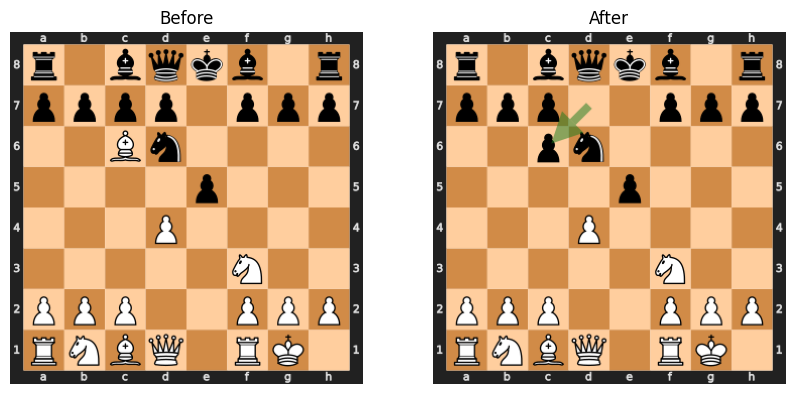

Evaluation for BLACK: +19
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+============+
| king_mobility                    |         | 0.125    | 0.125    |  0         |         | 0.125    | 0.25     |  0.125     |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |  0         |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0.125    | 0        | -0.125     |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.5      | -0.166667  |
| checked                          |         | 0        | 0        |  0         |    

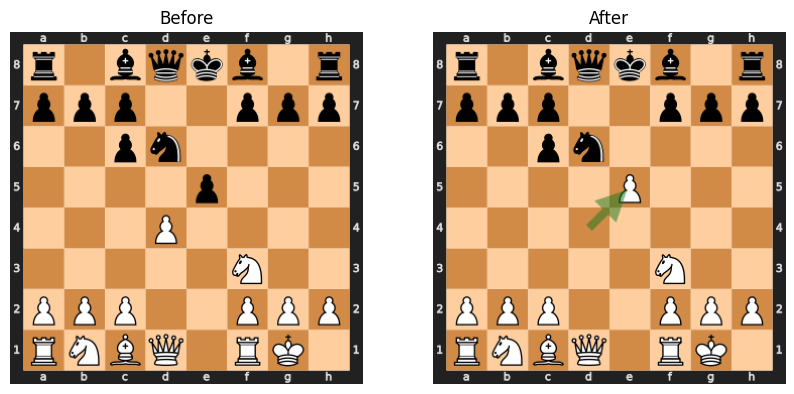

Evaluation for WHITE: -19
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+===========+
| king_mobility                    |         | 0.125    | 0.125    |  0         |         | 0.25     | 0.25     |  0        |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0         |         | 0.5      | 0.5      |  0        |
| checked                          |         | 0        | 0        |  0         |         | 

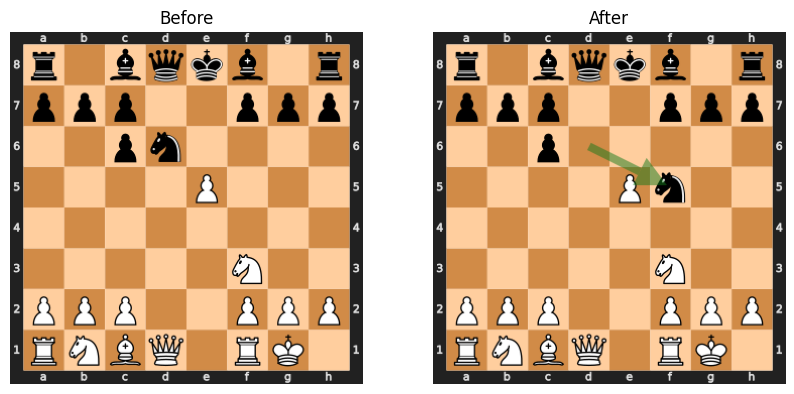

Evaluation for BLACK: +20
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.125    | 0.125    |  0     |         | 0.25     | 0.125    | -0.125    |
| king_centrality                  |         | 1        | 1        |  0     |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0     |         | 0        | 0.125    |  0.125    |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0     |         | 0.5      | 0.5      |  0        |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0        

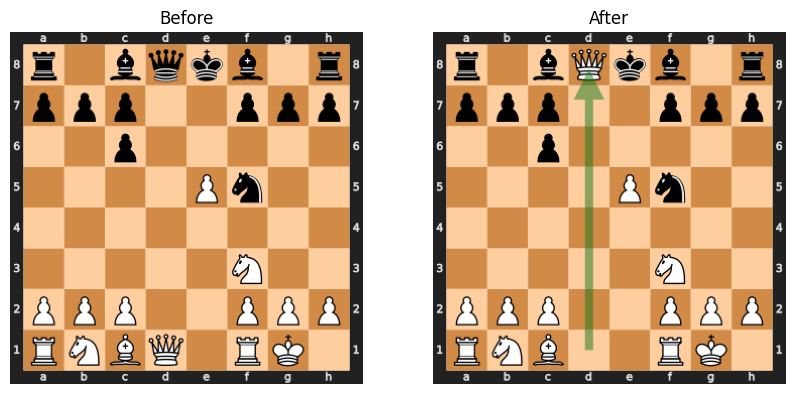

Evaluation for WHITE: -16
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+===========+
| king_mobility                    |         | 0.125    | 0.125    |  0        |         | 0.125    | 0.125    |  0        |
| king_centrality                  |         | 1        | 1        |  0        |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0        |         | 0.125    | 0.125    |  0        |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0        |         | 0.5      | 0.333333 | -0.166667 |
| checked                          |         | 0        | 0        |  0        |         | 0       

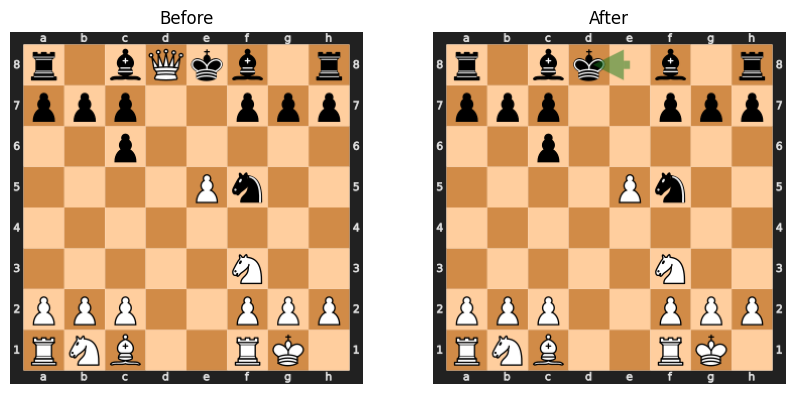

Evaluation for BLACK: +17
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.125    | 0.125    |  0     |         | 0.125    | 0.375    |  0.25  |
| king_centrality                  |         | 1        | 1        |  0     |         | 1        | 1        |  0     |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0     |         | 0.125    | 0        | -0.125 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0     |         | 0.333333 | 0.333333 |  0     |
| checked                          |         | 0        | 0        |  0     |         | 1        | 0        | -1     |
| castling_rights     

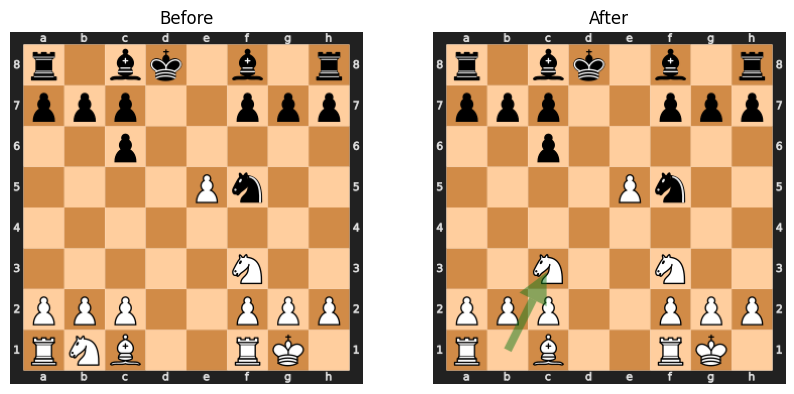

Evaluation for WHITE: -4
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.125    | 0.125    | 0         |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 1        | 0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        | 0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 | 0         |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        | 0         |         | 0        | 0        |      0 |

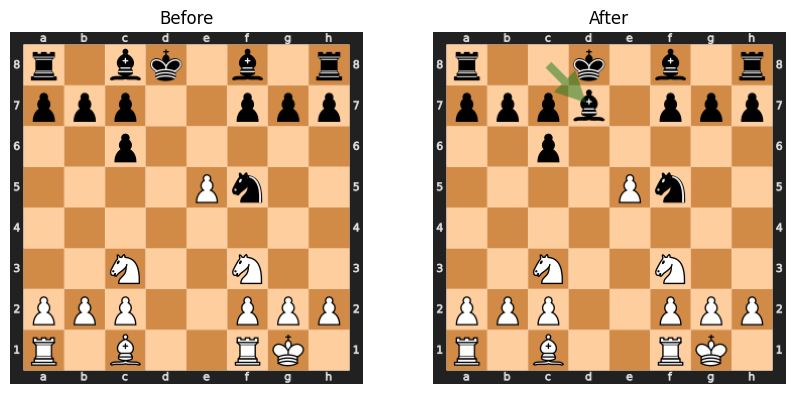

Evaluation for BLACK: +4
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.125    | 0.125    |      0 |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |      0 |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |      0 |
| castling_rights      

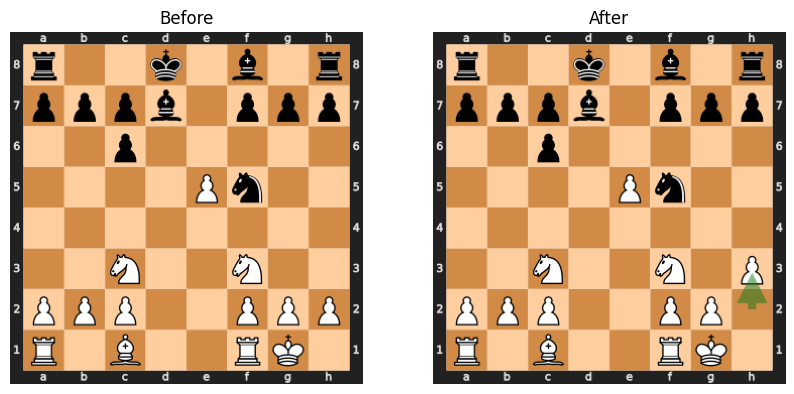

Evaluation for WHITE: -21
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.125    | 0.25     |  0.125     |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.5      | -0.166667  |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

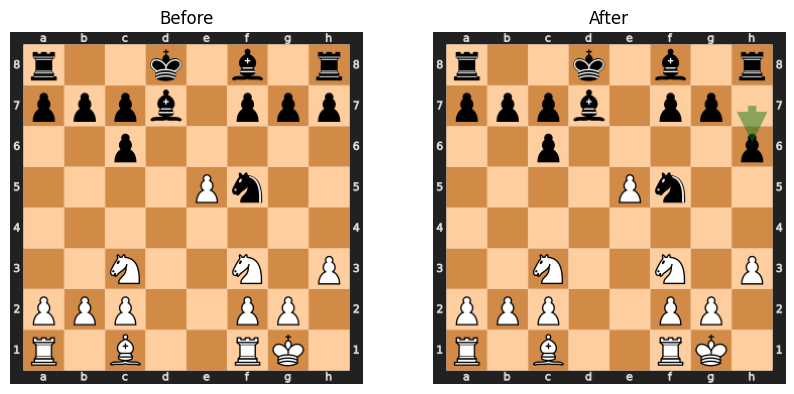

Evaluation for BLACK: +23
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.25     | 0.25     |      0 |         | 0.375    | 0.375    | 0         |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        | 0         |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0        | 0         |
| king_defenders_at_ring_1         |         | 0.5      | 0.5      |      0 |         | 0.333333 | 0.333333 | 0         |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        | 0         

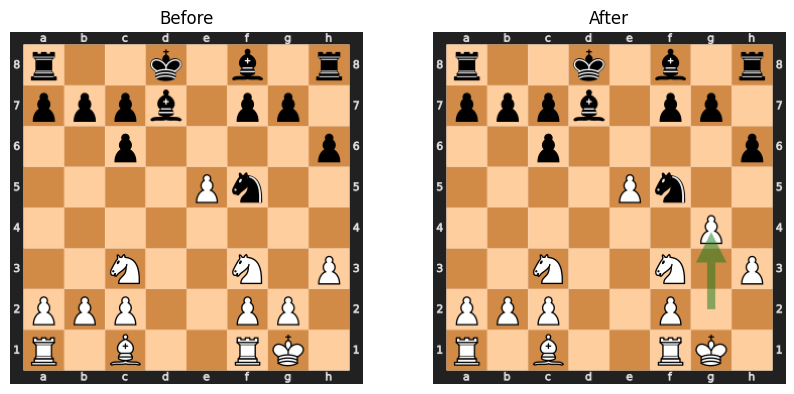

Evaluation for WHITE: -12
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.25     | 0.375    |  0.125     |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.5      | 0.333333 | -0.166667  |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

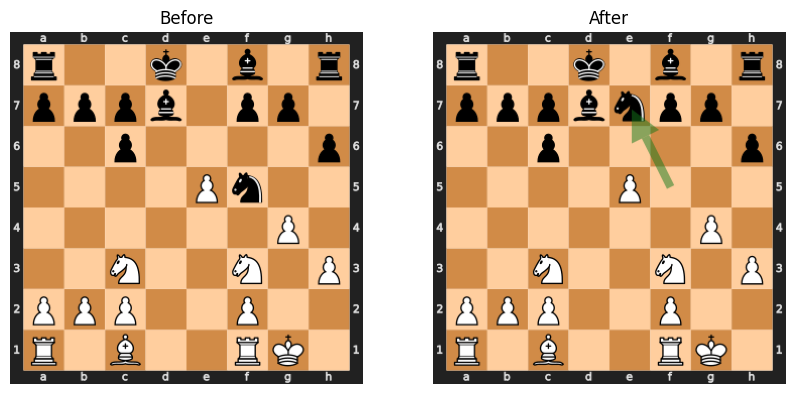

Evaluation for BLACK: +7
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.375    | 0.375    |      0 |         | 0.375    | 0.25     | -0.125    |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |      0 |         | 0.333333 | 0.5      |  0.166667 |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0        |

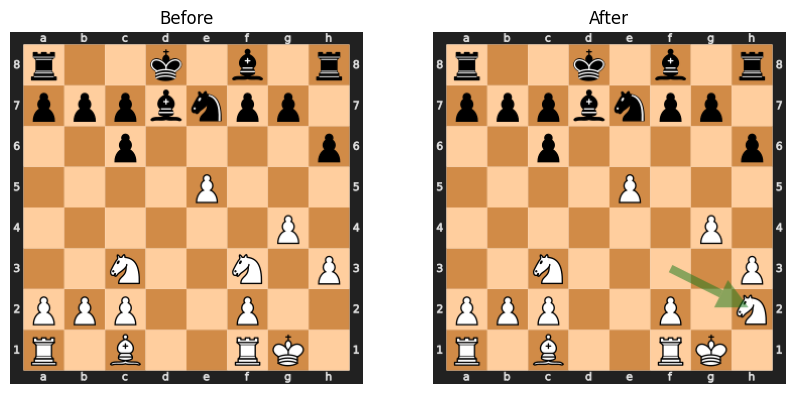

Evaluation for WHITE: +18
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.375    | 0.25     | -0.125     |         | 0.25     | 0.25     |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.333333 | 0.5      |  0.166667  |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

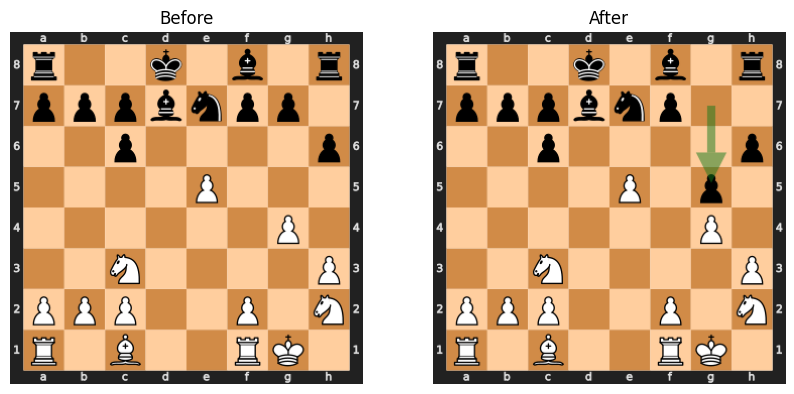

Evaluation for BLACK: +24
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.25     | 0.25     |  0     |         | 0.25     | 0.25     |  0     |
| king_centrality                  |         | 1        | 1        |  0     |         | 1        | 1        |  0     |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0     |         | 0        | 0        |  0     |
| king_defenders_at_ring_1         |         | 0.5      | 0.5      |  0     |         | 0.5      | 0.5      |  0     |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0     |
| castling_rights     

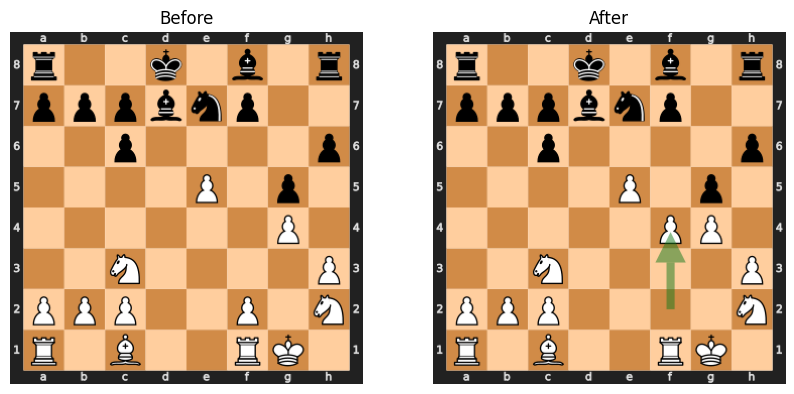

Evaluation for WHITE: -29
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.25     | 0.375    |  0.125     |         | 0.25     | 0.25     |  0     |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |  0     |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |  0     |
| king_defenders_at_ring_1         |         | 0.5      | 0.333333 | -0.166667  |         | 0.5      | 0.5      |  0     |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

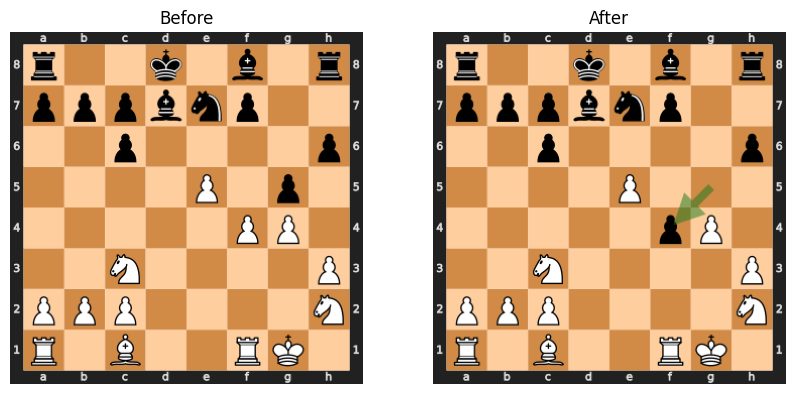

Evaluation for BLACK: +25
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+============+
| king_mobility                    |         | 0.375    | 0.375    |  0         |         | 0.25     | 0.25     |  0         |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |  0         |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |  0         |         | 0.5      | 0.5      |  0         |
| checked                          |         | 0        | 0        |  0         |    

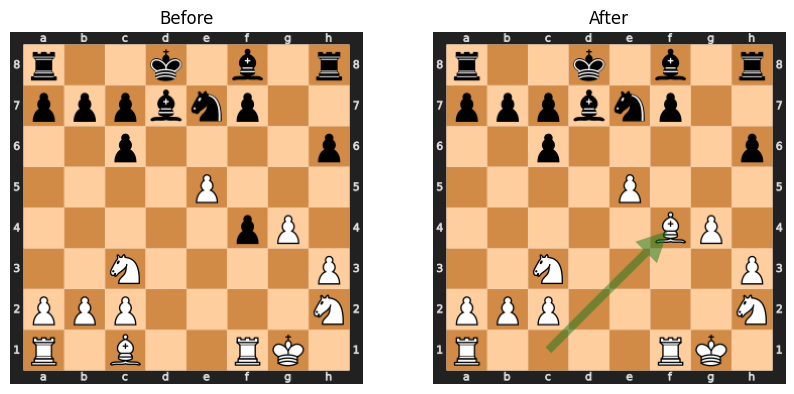

Evaluation for WHITE: -14
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+===========+
| king_mobility                    |         | 0.375    | 0.375    | 0         |         | 0.25     | 0.25     |  0        |
| king_centrality                  |         | 1        | 1        | 0         |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        | 0         |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 | 0         |         | 0.5      | 0.5      |  0        |
| checked                          |         | 0        | 0        | 0         |         | 0       

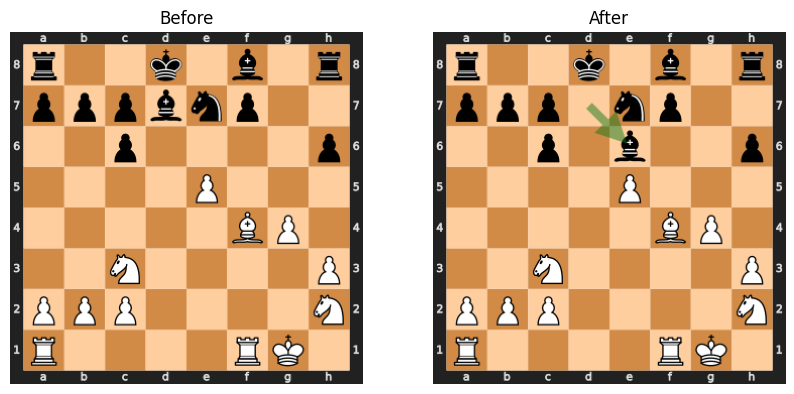

Evaluation for BLACK: +6
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.375    | 0.375    |  0     |         | 0.25     | 0.375    |  0.125    |
| king_centrality                  |         | 1        | 1        |  0     |         | 1        | 1        |  0        |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0     |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |  0     |         | 0.5      | 0.333333 | -0.166667 |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0        |

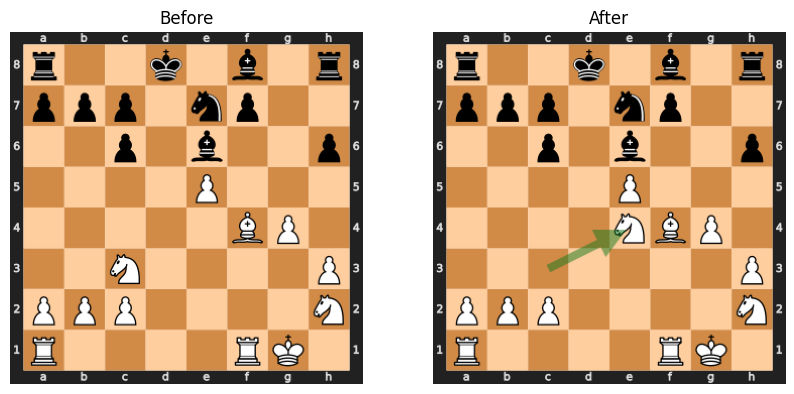

Evaluation for WHITE: -8
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.375    | 0.375    |  0         |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |  0         |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        | 

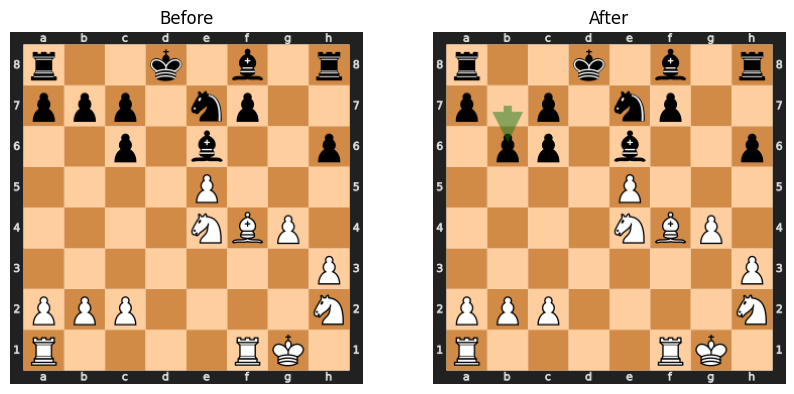

Evaluation for BLACK: +34
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.375    | 0.375    |      0 |         | 0.375    | 0.375    | 0         |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        | 0         |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0        | 0         |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |      0 |         | 0.333333 | 0.333333 | 0         |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        | 0         

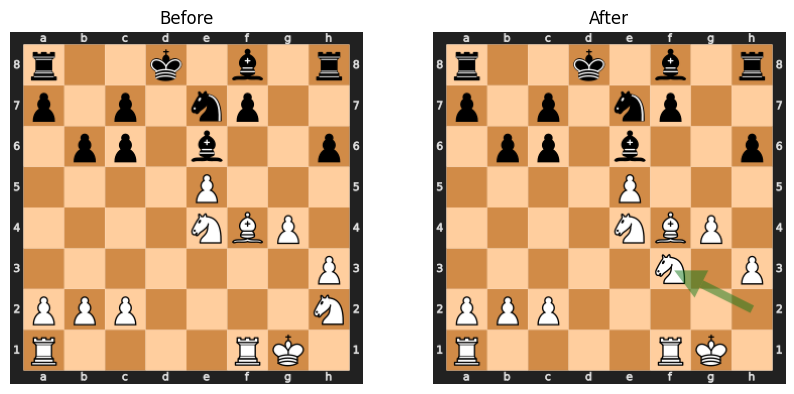

Evaluation for WHITE: -26
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.375    | 0.5      |  0.125     |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 1        |  0         |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.333333 | 0.166667 | -0.166667  |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

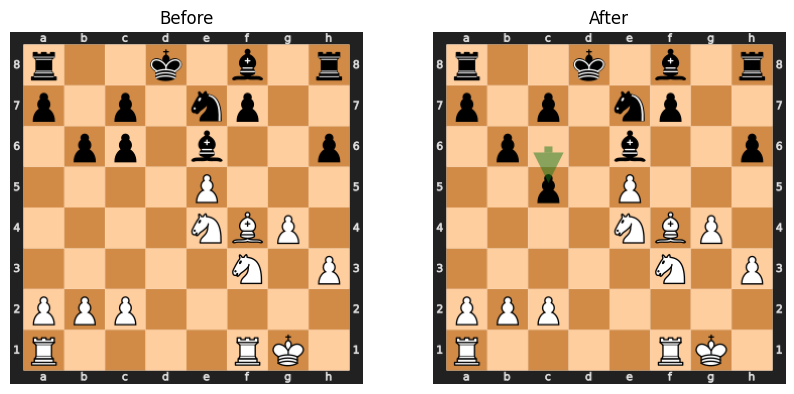

Evaluation for BLACK: +42
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      |      0 |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |      0 |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |      0 |
| castling_rights     

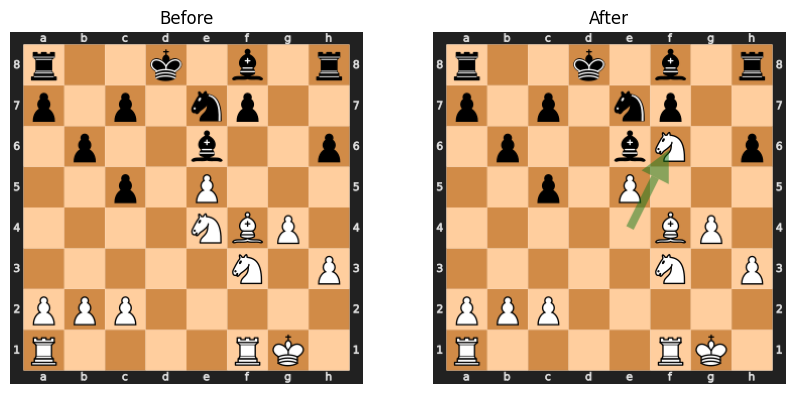

Evaluation for WHITE: -36
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      | 0         |         | 0.375    | 0.125    | -0.25  |
| king_centrality                  |         | 1        | 1        | 0         |         | 1        | 1        |  0     |
| king_attackers_looking_at_ring_1 |         | 0        | 0        | 0         |         | 0        | 0.125    |  0.125 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 | 0         |         | 0.333333 | 0.333333 |  0     |
| checked                          |         | 0        | 0        | 0         |         | 0        | 0        |  0     

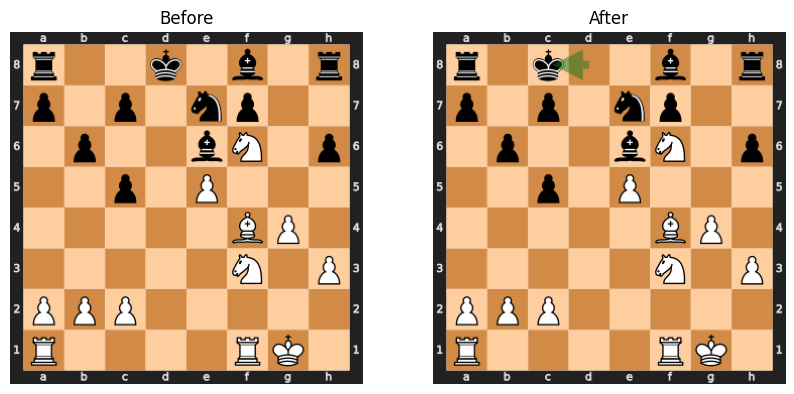

Evaluation for BLACK: +30
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.5      | 0.5      |      0 |         | 0.125    | 0.375    |  0.25      |
| king_centrality                  |         | 1        | 1        |      0 |         | 1        | 1        |  0         |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0.125    | 0.125    |  0         |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |      0 |         | 0.333333 | 0.166667 | -0.166667  |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0 

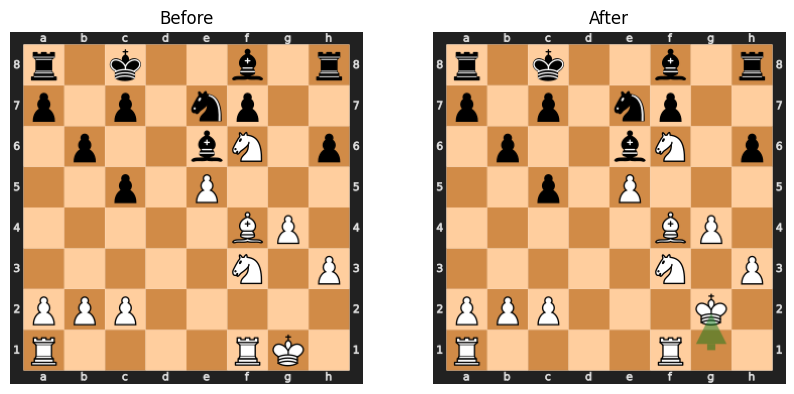

Evaluation for WHITE: -31
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.625    |  0.125    |         | 0.375    | 0.375    |      0 |
| king_centrality                  |         | 1        | 0.666667 | -0.333333 |         | 1        | 1        |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |  0        |         | 0.125    | 0.125    |      0 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.5      |  0.333333 |         | 0.166667 | 0.166667 |      0 |
| checked                          |         | 0        | 0        |  0        |         | 0        | 0        |      0 

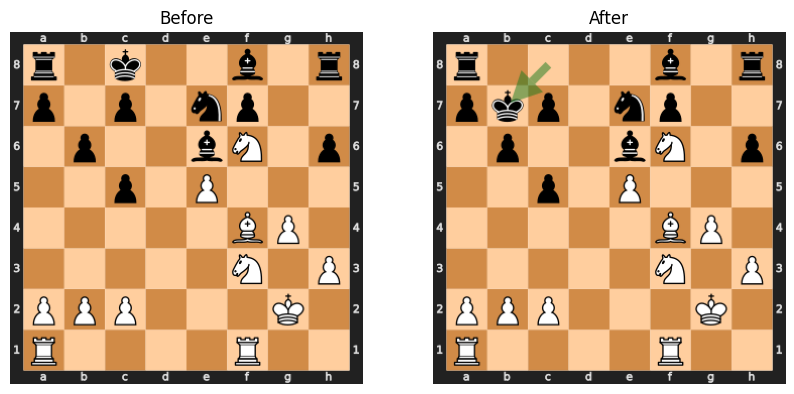

Evaluation for BLACK: +33
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.625    | 0.625    |      0 |         | 0.375    | 0.5      |  0.125     |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 1        | 0.666667 | -0.333333  |
| king_attackers_looking_at_ring_1 |         | 0        | 0        |      0 |         | 0.125    | 0        | -0.125     |
| king_defenders_at_ring_1         |         | 0.5      | 0.5      |      0 |         | 0.166667 | 0.666667 |  0.5       |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0 

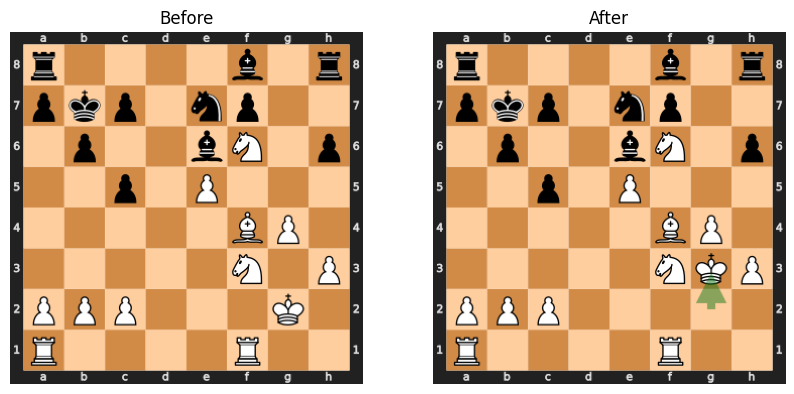

Evaluation for WHITE: -28
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.5      | -0.125     |         | 0.5      | 0.5      |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0        | 0.125    |  0.125     |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.5      | 0.666667 |  0.166667  |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

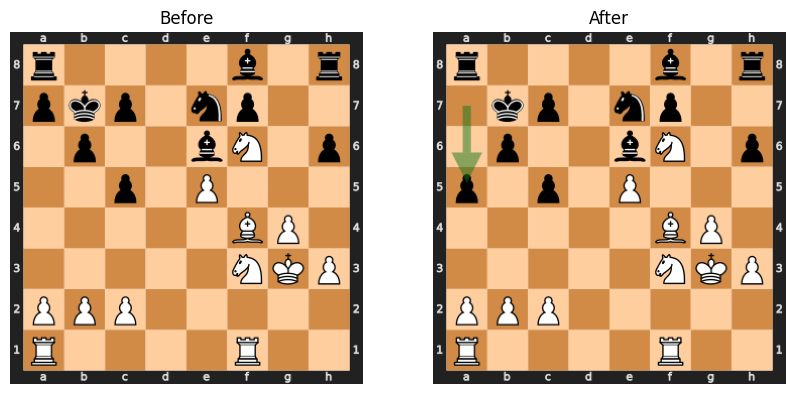

Evaluation for BLACK: +58
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.5      | 0.5      |      0 |         | 0.5      | 0.625    |  0.125     |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |      0 |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.5      | -0.166667  |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0 

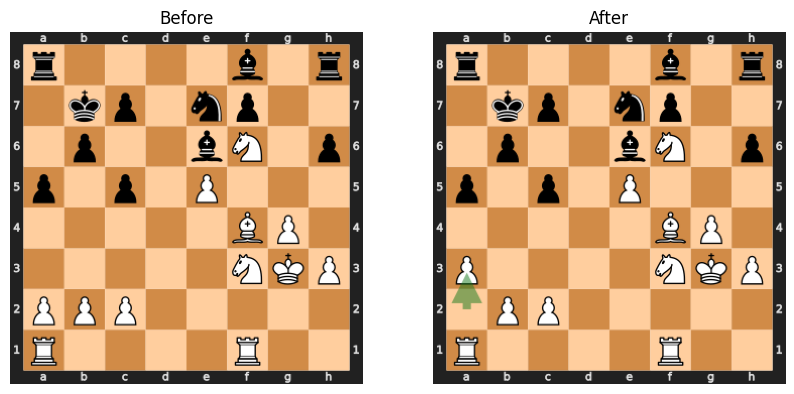

Evaluation for WHITE: -37
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      | 0         |         | 0.625    | 0.625    |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 | 0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    | 0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 | 0         |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0        | 0        | 0         |         | 0        | 0        |      0 

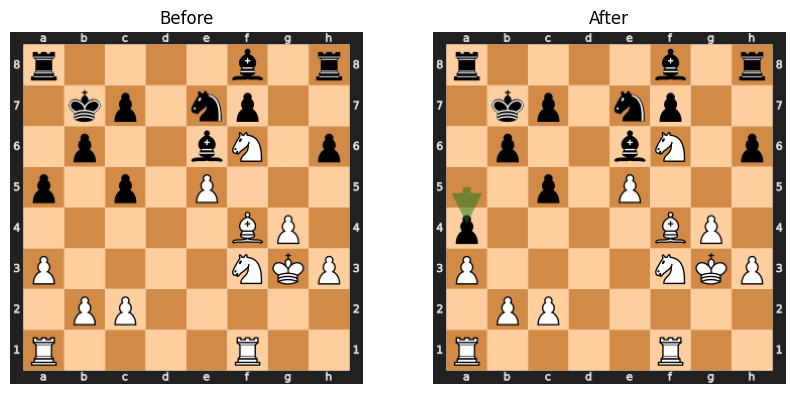

Evaluation for BLACK: +32
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.5      | 0.5      |  0     |         | 0.625    | 0.625    |  0         |
| king_centrality                  |         | 0.666667 | 0.666667 |  0     |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0     |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0     |         | 0.5      | 0.5      |  0         |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0 

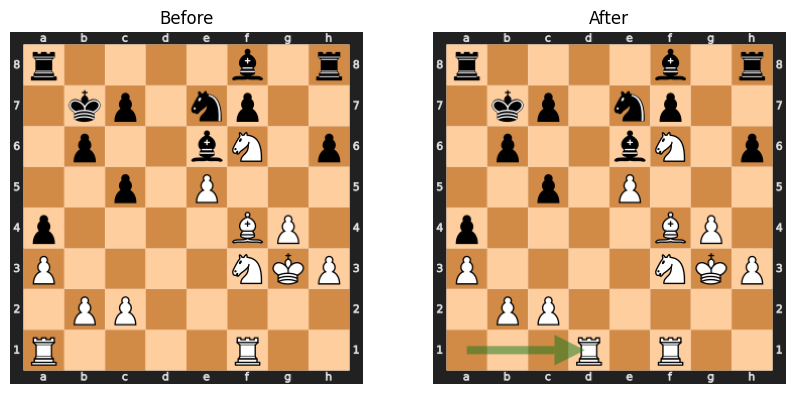

Evaluation for WHITE: -30
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      |  0         |         | 0.625    | 0.625    |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0         |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

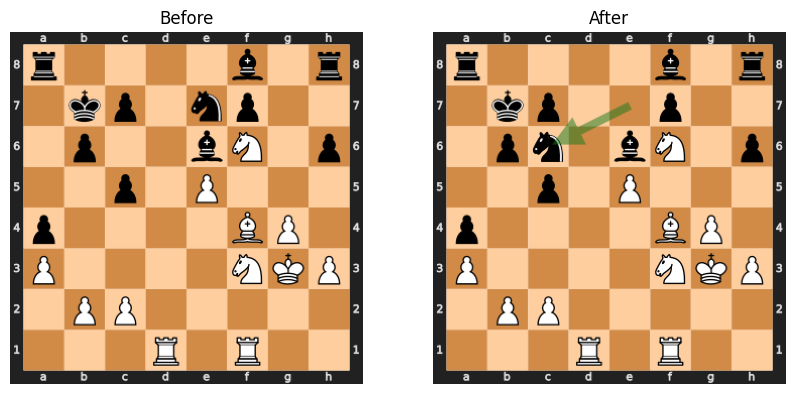

Evaluation for BLACK: +25
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.5      | 0.5      |      0 |         | 0.625    | 0.5      | -0.125     |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |      0 |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |      0 |         | 0.5      | 0.666667 |  0.166667  |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0 

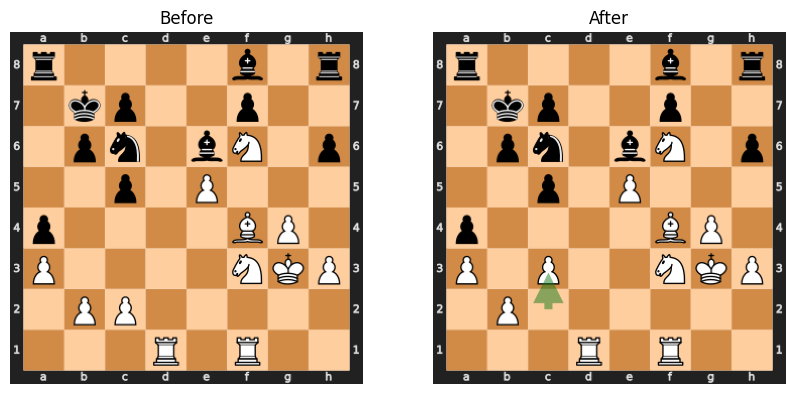

Evaluation for WHITE: -22
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      | 0         |         | 0.5      | 0.5      |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 | 0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    | 0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 | 0         |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        | 0         |         | 0        | 0        |      0 

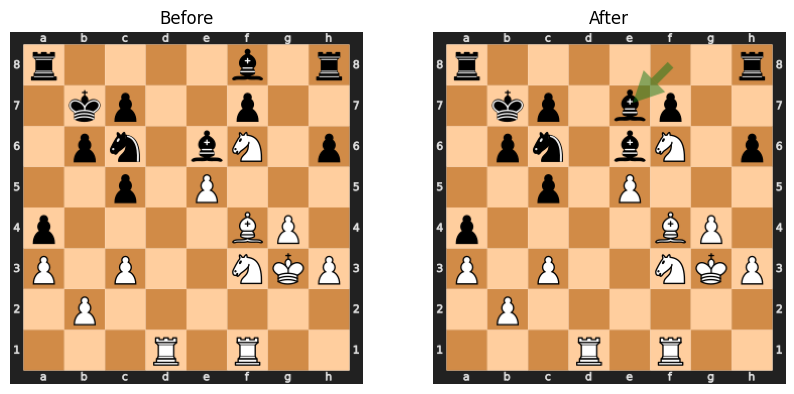

Evaluation for BLACK: +28
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      |      0 |         | 0.5      | 0.5      |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |      0 |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |      0 |
| castling_rights     

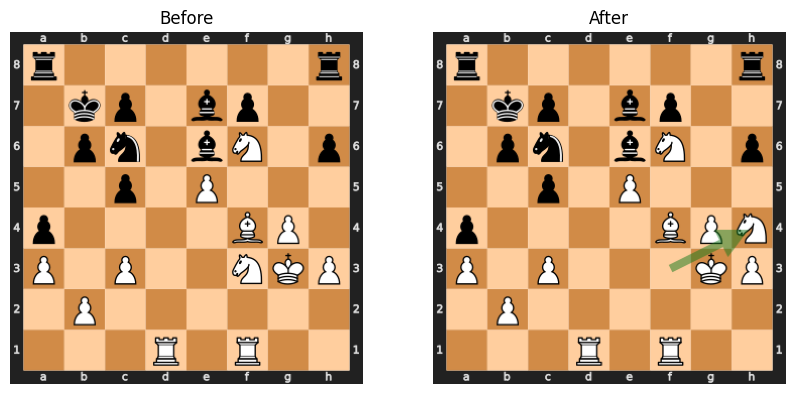

Evaluation for WHITE: 0
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      |  0         |         | 0.5      | 0.5      |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |  

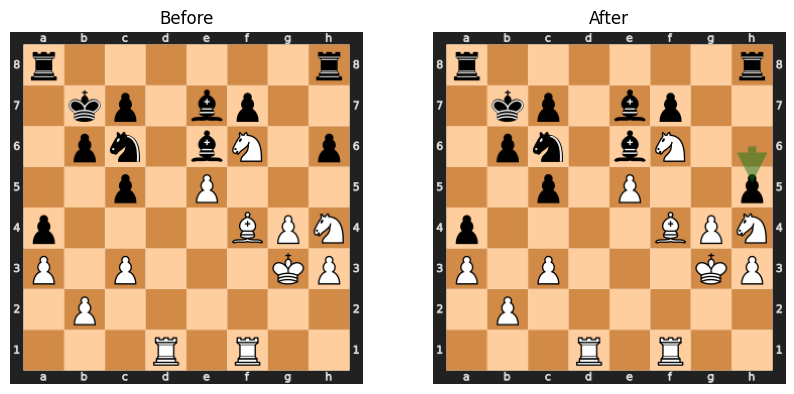

Evaluation for BLACK: -11
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      |  0     |         | 0.5      | 0.5      |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0     |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.25     |  0.125 |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.666667 | 0.666667 |  0     |         | 0.666667 | 0.666667 |      0 |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |      0 |
| castling_rights     

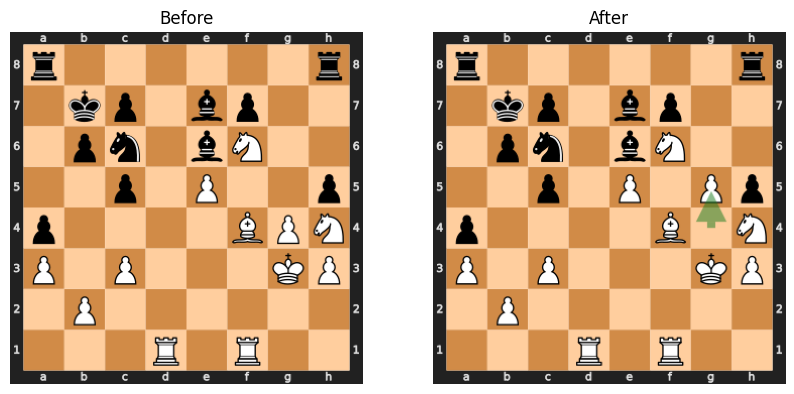

Evaluation for WHITE: +33
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      |  0         |         | 0.5      | 0.5      |  0     |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |  0     |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0         |         | 0        | 0        |  0     |
| king_defenders_at_ring_1         |         | 0.666667 | 0.5      | -0.166667  |         | 0.666667 | 0.666667 |  0     |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

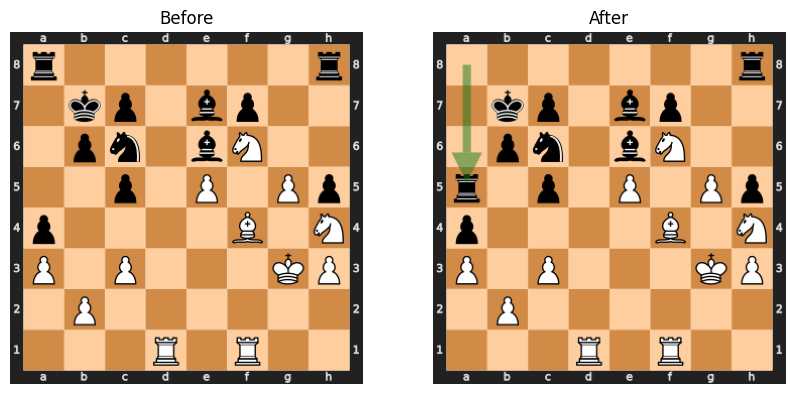

Evaluation for BLACK: +31
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.5      | 0.5      |      0 |         | 0.5      | 0.625    |  0.125    |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |  0        |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |      0 |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.5      | 0.5      |      0 |         | 0.666667 | 0.5      | -0.166667 |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0        

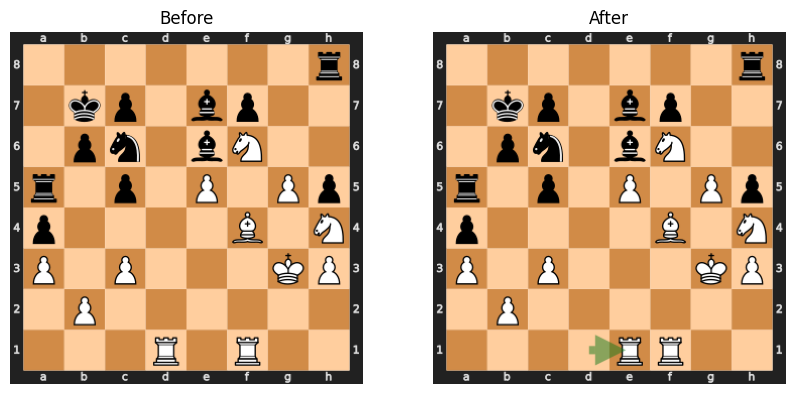

Evaluation for WHITE: -29
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.5      |  0         |         | 0.625    | 0.625    |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.5      | 0.5      |  0         |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

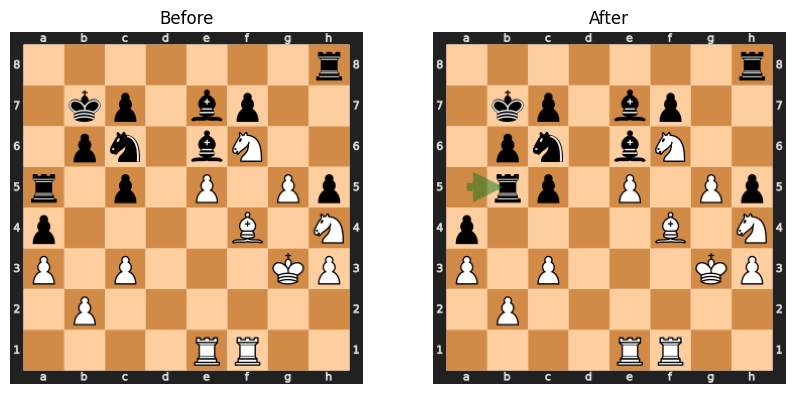

Evaluation for BLACK: +21
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.5      | 0.5      |      0 |         | 0.625    | 0.625    |  0         |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |      0 |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0.5      | 0.5      |      0 |         | 0.5      | 0.5      |  0         |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0 

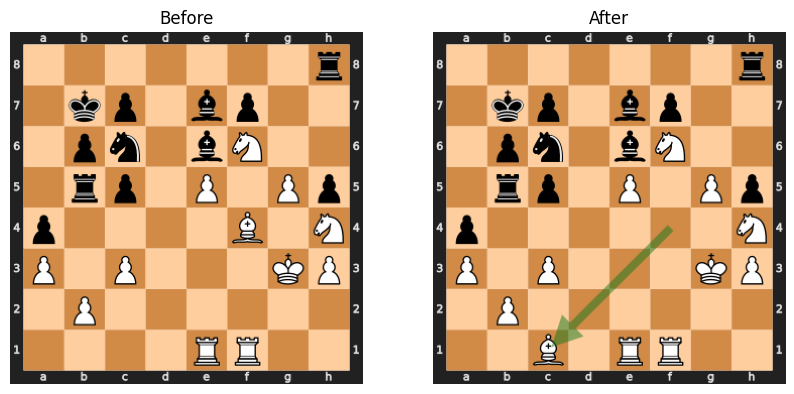

Evaluation for WHITE: +51
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.625    |  0.125     |         | 0.625    | 0.625    |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.5      | 0.333333 | -0.166667  |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

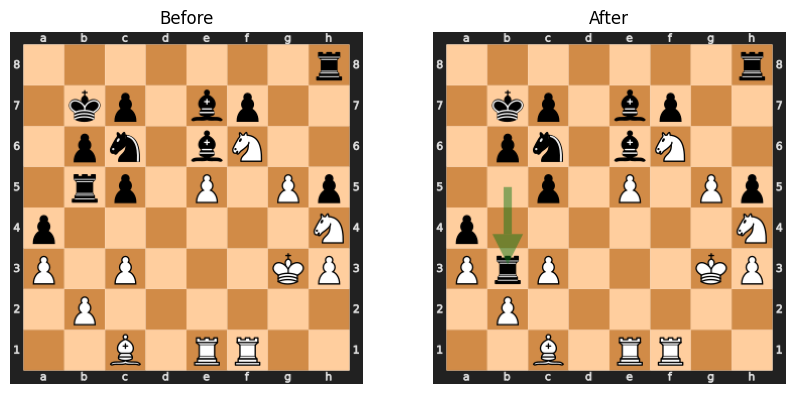

Evaluation for BLACK: +84
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.625    | 0.625    |  0     |         | 0.625    | 0.625    | 0         |
| king_centrality                  |         | 0.666667 | 0.666667 |  0     |         | 0.666667 | 0.666667 | 0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0     |         | 0        | 0        | 0         |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |  0     |         | 0.5      | 0.5      | 0         |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        | 0         

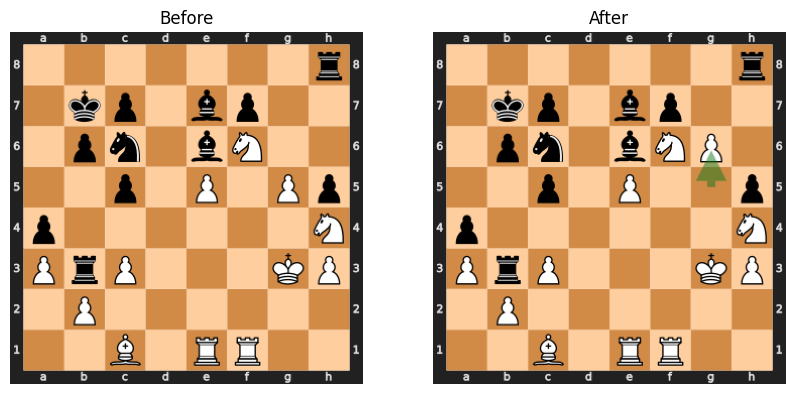

Evaluation for WHITE: -55
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.625    |  0         |         | 0.625    | 0.625    |  0     |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |  0     |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0         |         | 0        | 0        |  0     |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |  0         |         | 0.5      | 0.5      |  0     |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        |

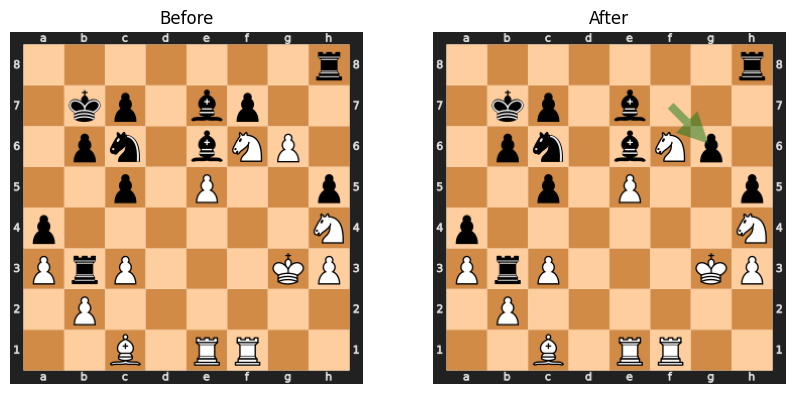

Evaluation for BLACK: +64
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+============+
| king_mobility                    |         | 0.625    | 0.625    |  0         |         | 0.625    | 0.625    |  0         |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0         |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |  0         |         | 0.5      | 0.5      |  0         |
| checked                          |         | 0        | 0        |  0         |    

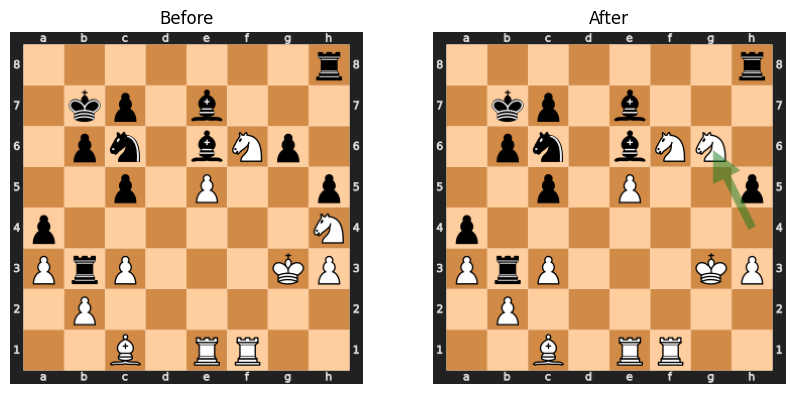

Evaluation for WHITE: -69
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+============+
| king_mobility                    |         | 0.625    | 0.75     |  0.125    |         | 0.625    | 0.625    |  0         |
| king_centrality                  |         | 0.666667 | 0.666667 |  0        |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0        |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0.333333 | 0.166667 | -0.166667 |         | 0.5      | 0.5      |  0         |
| checked                          |         | 0        | 0        |  0        |         | 0

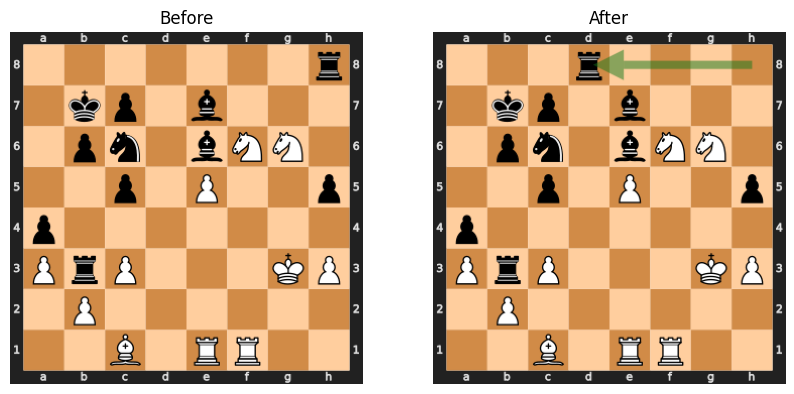

Evaluation for BLACK: +109
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.75     | 0.75     |      0 |         | 0.625    | 0.625    | 0         |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 | 0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |      0 |         | 0        | 0        | 0         |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |      0 |         | 0.5      | 0.5      | 0         |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        | 0        

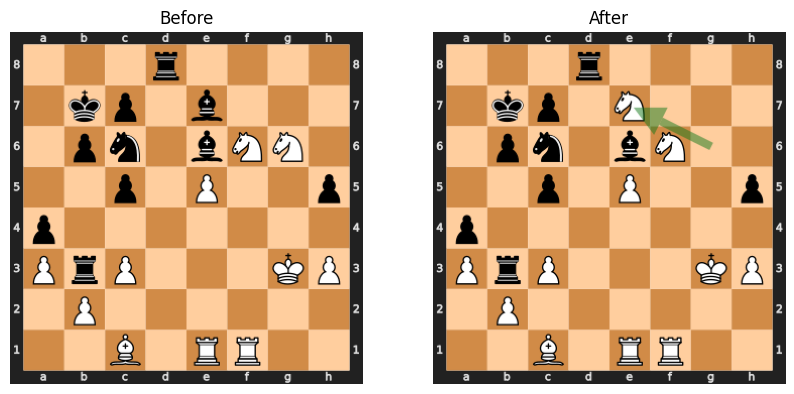

Evaluation for WHITE: -76
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+============+
| king_mobility                    |         | 0.75     | 0.75     |  0         |         | 0.625    | 0.5      | -0.125     |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0         |         | 0        | 0.125    |  0.125     |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0         |         | 0.5      | 0.5      |  0         |
| checked                          |         | 0        | 0        |  0         |    

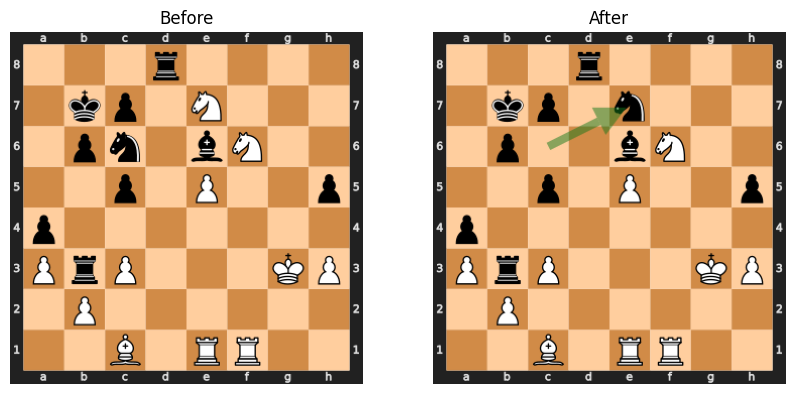

Evaluation for BLACK: +92
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.75     | 0.75     |      0 |         | 0.5      | 0.75     |  0.25      |
| king_centrality                  |         | 0.666667 | 0.666667 |      0 |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |      0 |         | 0.125    | 0        | -0.125     |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |      0 |         | 0.5      | 0.333333 | -0.166667  |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0 

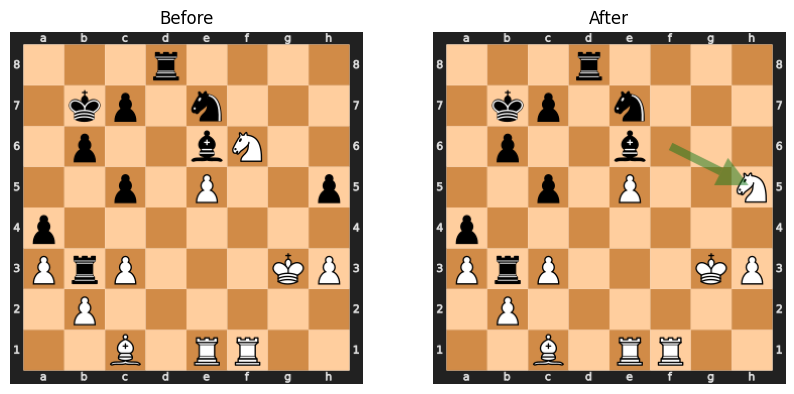

Evaluation for WHITE: -105
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+===========+
| king_mobility                    |         | 0.75     | 0.75     |  0         |         | 0.75     | 0.75     |  0        |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |  0        |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.125    | -0.125     |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0         |         | 0.333333 | 0.333333 |  0        |
| checked                          |         | 0        | 0        |  0         |         |

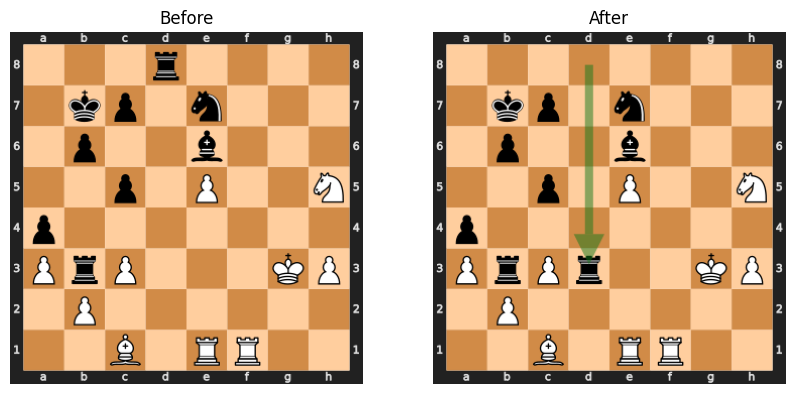

Evaluation for BLACK: +85
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.75     | 0.625    | -0.125 |         | 0.75     | 0.75     |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0     |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.25     |  0.125 |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0     |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 1        |  1     |         | 0        | 0        |      0 |
| castling_rights     

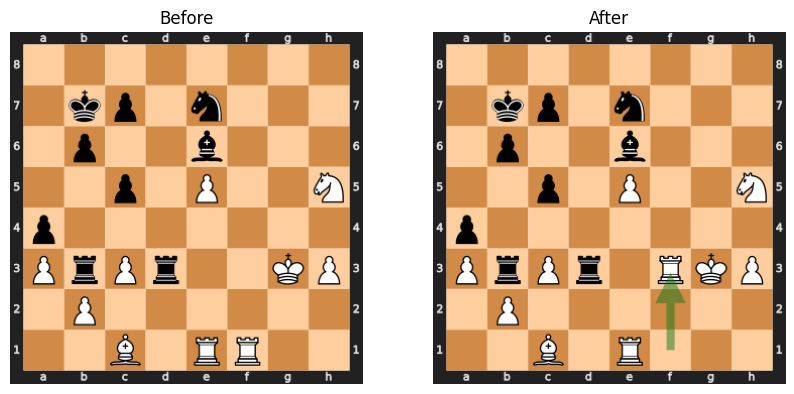

Evaluation for WHITE: -76
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.625    |  0        |         | 0.75     | 0.75     |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0        |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0        |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.333333 |  0.166667 |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 1        | 0        | -1        |         | 0        | 0        |      0 

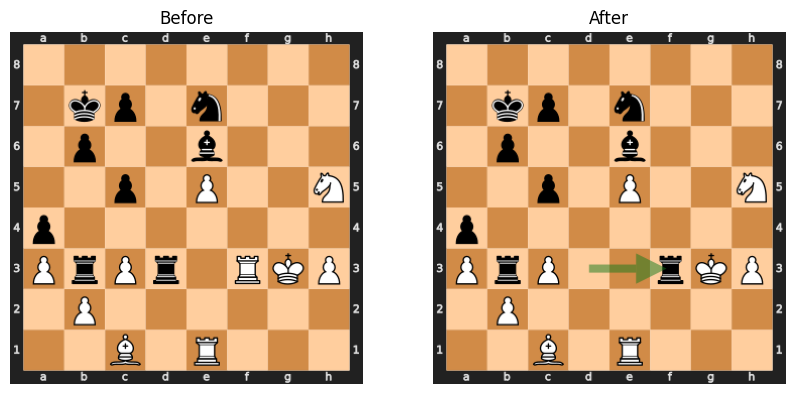

Evaluation for BLACK: +79
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.5      | -0.125     |         | 0.75     | 0.75     |      0 |
| king_centrality                  |         | 0.666667 | 0.666667 |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0.333333 | 0.166667 | -0.166667  |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 1        |  1         |         | 0        | 0        |

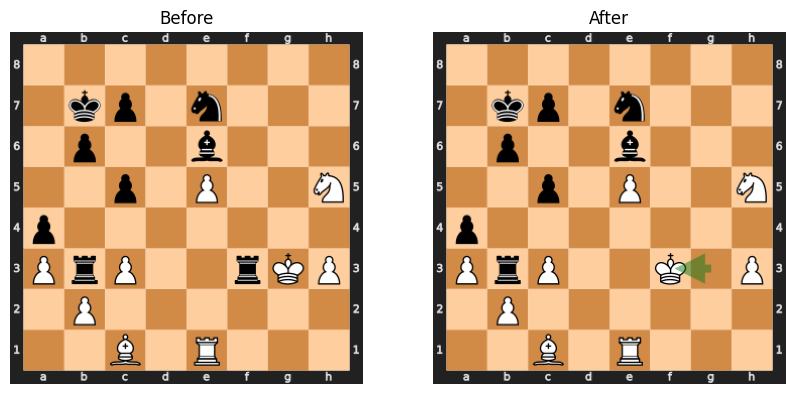

Evaluation for WHITE: -76
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+===========+
| king_mobility                    |         | 0.5      | 0.875    |  0.375     |         | 0.75     | 0.75     |  0        |
| king_centrality                  |         | 0.666667 | 0.333333 | -0.333333  |         | 0.666667 | 0.666667 |  0        |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.125    | -0.125     |         | 0        | 0        |  0        |
| king_defenders_at_ring_1         |         | 0.166667 | 0        | -0.166667  |         | 0.333333 | 0.333333 |  0        |
| checked                          |         | 1        | 0        | -1         |         | 

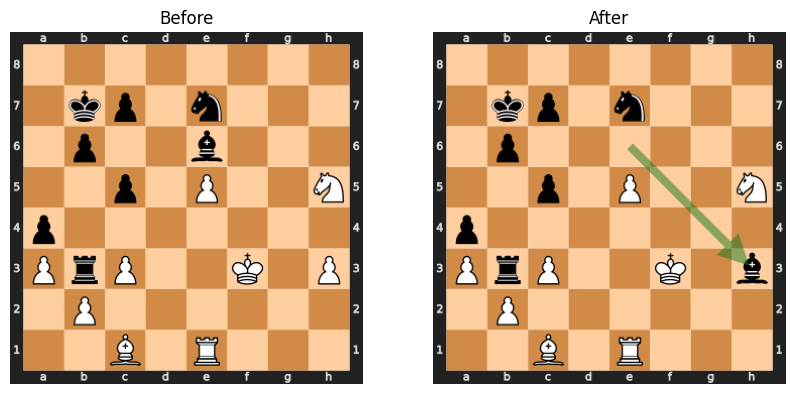

Evaluation for BLACK: +65
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+============+
| king_mobility                    |         | 0.875    | 0.75     | -0.125    |         | 0.75     | 0.75     |  0         |
| king_centrality                  |         | 0.333333 | 0.333333 |  0        |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0        |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0        | 0        |  0        |         | 0.333333 | 0.333333 |  0         |
| checked                          |         | 0        | 0        |  0        |         | 0

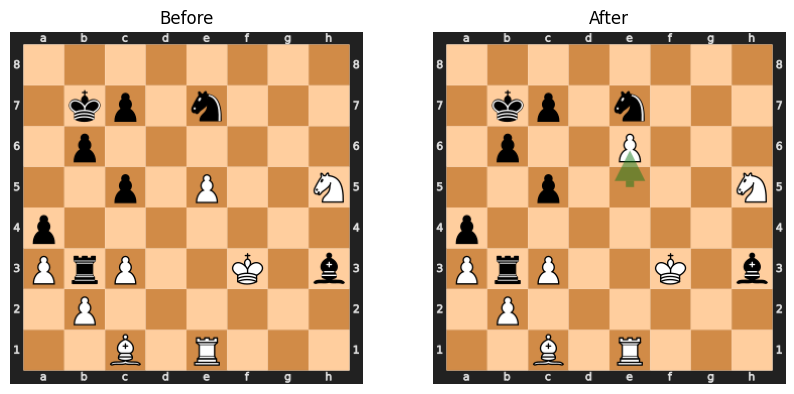

Evaluation for WHITE: -78
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.75     | 0.75     |  0        |         | 0.75     | 0.75     |      0 |
| king_centrality                  |         | 0.333333 | 0.333333 |  0        |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0        |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0        | 0        |  0        |         | 0.333333 | 0.333333 |      0 |
| checked                          |         | 0        | 0        |  0        |         | 0        | 0        |      0 

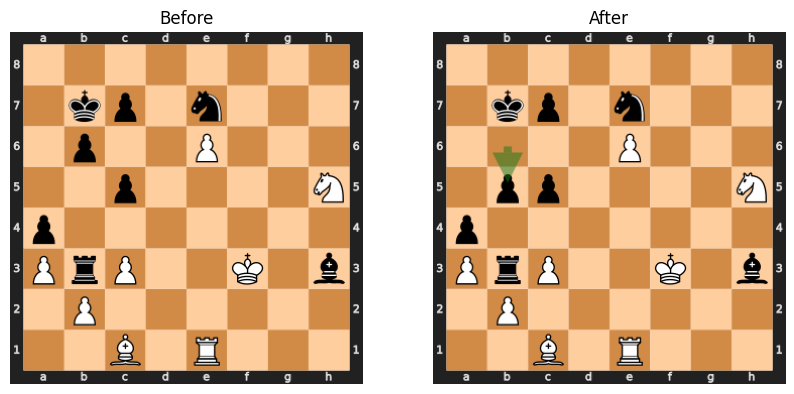

Evaluation for BLACK: +77
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.75     | 0.75     |      0 |         | 0.75     | 0.875    |  0.125     |
| king_centrality                  |         | 0.333333 | 0.333333 |      0 |         | 0.666667 | 0.666667 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |      0 |         | 0        | 0        |  0         |
| king_defenders_at_ring_1         |         | 0        | 0        |      0 |         | 0.333333 | 0.166667 | -0.166667  |
| checked                          |         | 0        | 0        |      0 |         | 0        | 0        |  0 

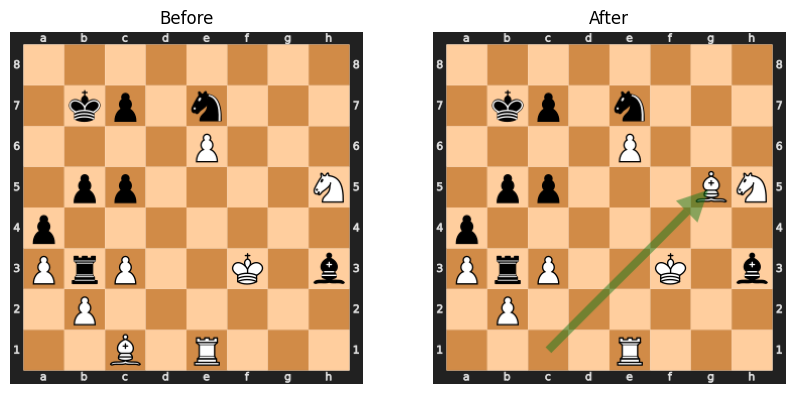

Evaluation for WHITE: -67
+----------------------------------+---------+----------+-----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |     After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+===========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.75     | 0.75      |  0         |         | 0.875    | 0.875    |      0 |
| king_centrality                  |         | 0.333333 | 0.333333  |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125     |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0        | 0         |  0         |         | 0.166667 | 0.166667 |      0 |
| checked                          |         | 0        | 0         |  0         |         | 0        | 0 

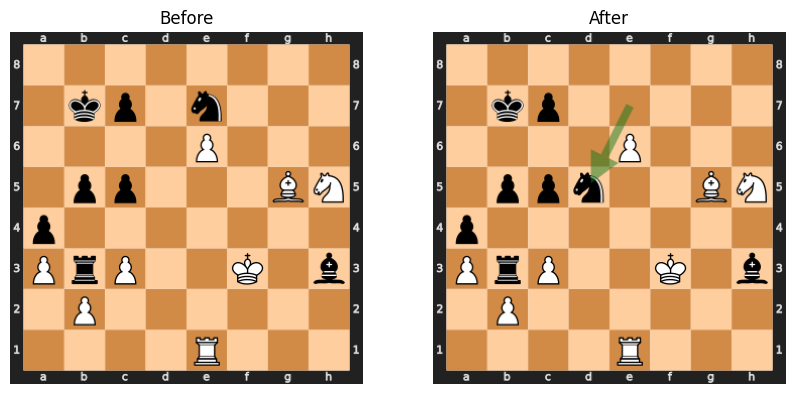

Evaluation for BLACK: +81
+----------------------------------+---------+-----------+-----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |    Before |     After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+===========+===========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.75      | 0.5       | -0.25  |         | 0.875    | 0.875    | 0         |
| king_centrality                  |         | 0.333333  | 0.333333  |  0     |         | 0.666667 | 0.666667 | 0         |
| king_attackers_looking_at_ring_1 |         | 0.125     | 0.25      |  0.125 |         | 0        | 0        | 0         |
| king_defenders_at_ring_1         |         | 0         | 0         |  0     |         | 0.166667 | 0.166667 | 0         |
| checked                          |         | 0         | 0         |  0     |         | 0        | 0    

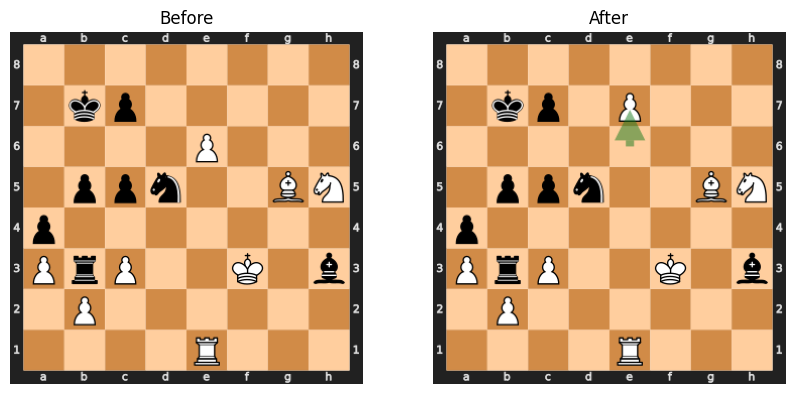

Evaluation for WHITE: -84
+----------------------------------+---------+-----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |    Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+===========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.5       | 0.5      | 0         |         | 0.875    | 0.875    |      0 |
| king_centrality                  |         | 0.333333  | 0.333333 | 0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.25      | 0.25     | 0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0         | 0        | 0         |         | 0.166667 | 0.166667 |      0 |
| checked                          |         | 0         | 0        | 0         |         | 0        | 0        |

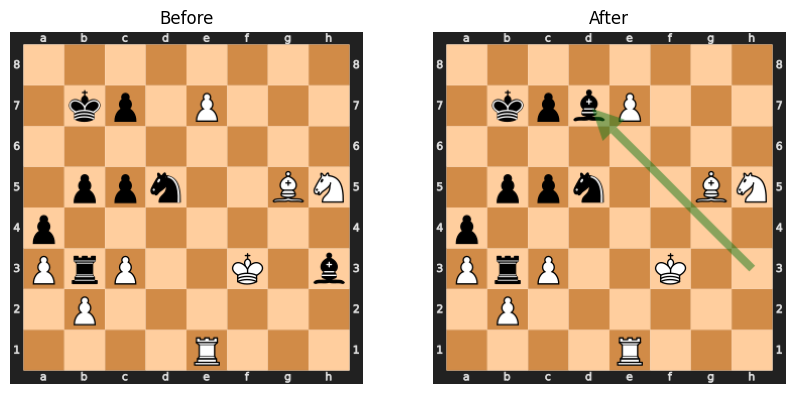

Evaluation for BLACK: +77
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.5      | 0.625    |  0.125 |         | 0.875    | 0.875    | 0         |
| king_centrality                  |         | 0.333333 | 0.333333 |  0     |         | 0.666667 | 0.666667 | 0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25     |  0     |         | 0        | 0        | 0         |
| king_defenders_at_ring_1         |         | 0        | 0        |  0     |         | 0.166667 | 0.166667 | 0         |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        | 0         

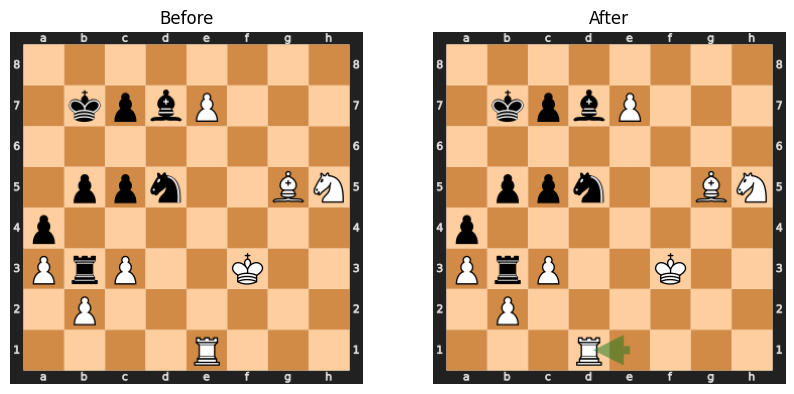

Evaluation for WHITE: -75
+----------------------------------+---------+----------+-----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |     After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+===========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.625     |  0         |         | 0.875    | 0.875    |      0 |
| king_centrality                  |         | 0.333333 | 0.333333  |  0         |         | 0.666667 | 0.666667 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.25      |  0         |         | 0        | 0        |      0 |
| king_defenders_at_ring_1         |         | 0        | 0         |  0         |         | 0.166667 | 0.166667 |      0 |
| checked                          |         | 0        | 0         |  0         |         | 0        | 0 

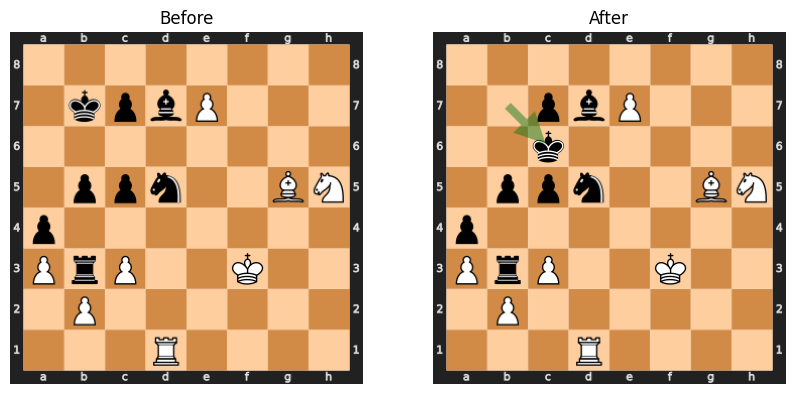

Evaluation for BLACK: +121
+----------------------------------+---------+-----------+-----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |    Before |     After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+===========+===========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.625     | 0.625     |      0 |         | 0.875    | 0.375    | -0.5      |
| king_centrality                  |         | 0.333333  | 0.333333  |      0 |         | 0.666667 | 0.333333 | -0.333333 |
| king_attackers_looking_at_ring_1 |         | 0.25      | 0.25      |      0 |         | 0        | 0.125    |  0.125    |
| king_defenders_at_ring_1         |         | 0         | 0         |      0 |         | 0.166667 | 0.833333 |  0.666667 |
| checked                          |         | 0         | 0         |      0 |         | 0        | 0   

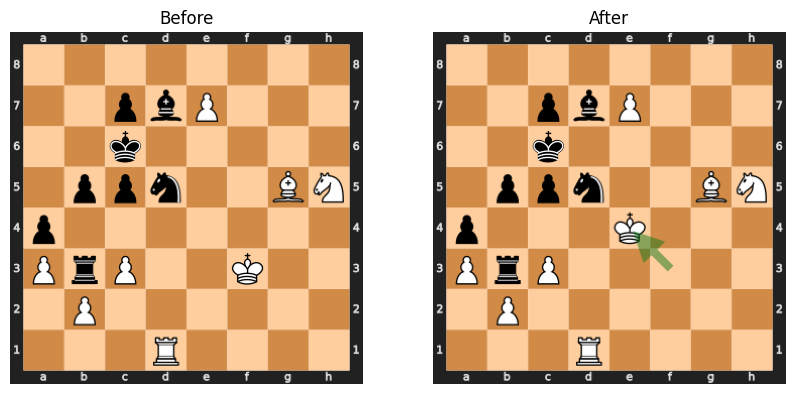

Evaluation for WHITE: -131
+----------------------------------+---------+-----------+-----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |    Before |     After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+===========+===========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.625     | 0.375     | -0.25     |         | 0.375    | 0.375    |  0     |
| king_centrality                  |         | 0.333333  | 0         | -0.333333 |         | 0.333333 | 0.333333 |  0     |
| king_attackers_looking_at_ring_1 |         | 0.25      | 0.5       |  0.25     |         | 0.125    | 0.25     |  0.125 |
| king_defenders_at_ring_1         |         | 0         | 0         |  0        |         | 0.833333 | 0.833333 |  0     |
| checked                          |         | 0         | 0         |  0        |         | 0        | 0

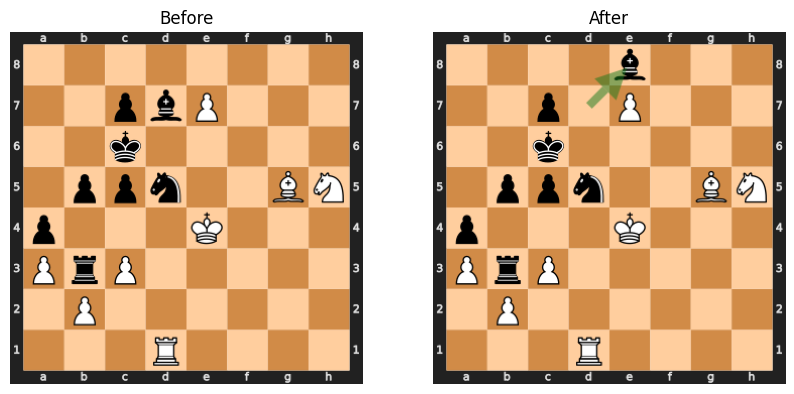

Evaluation for BLACK: +253
+----------------------------------+---------+-----------+-----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |    Before |     After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+===========+===========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.375     | 0.5       |  0.125 |         | 0.375    | 0.5      |  0.125     |
| king_centrality                  |         | 0         | 0         |  0     |         | 0.333333 | 0.333333 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.5       | 0.375     | -0.125 |         | 0.25     | 0.25     |  0         |
| king_defenders_at_ring_1         |         | 0         | 0         |  0     |         | 0.833333 | 0.666667 | -0.166667  |
| checked                          |         | 0         | 0         |  0     |         | 0       

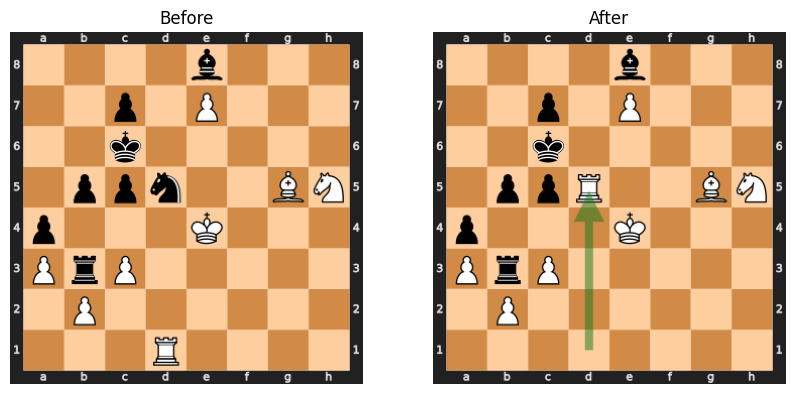

Evaluation for WHITE: -302
+----------------------------------+---------+-----------+----------+------------+---------+----------+----------+------------+
| Feature                          | WHITE   |    Before |    After |       Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+===========+==========+============+=========+==========+==========+============+
| king_mobility                    |         | 0.5       | 0.75     |  0.25      |         | 0.5      | 0.25     | -0.25      |
| king_centrality                  |         | 0         | 0        |  0         |         | 0.333333 | 0.333333 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.375     | 0.25     | -0.125     |         | 0.25     | 0.25     |  0         |
| king_defenders_at_ring_1         |         | 0         | 0.166667 |  0.166667  |         | 0.666667 | 0.5      | -0.166667  |
| checked                          |         | 0         | 0        |  0     

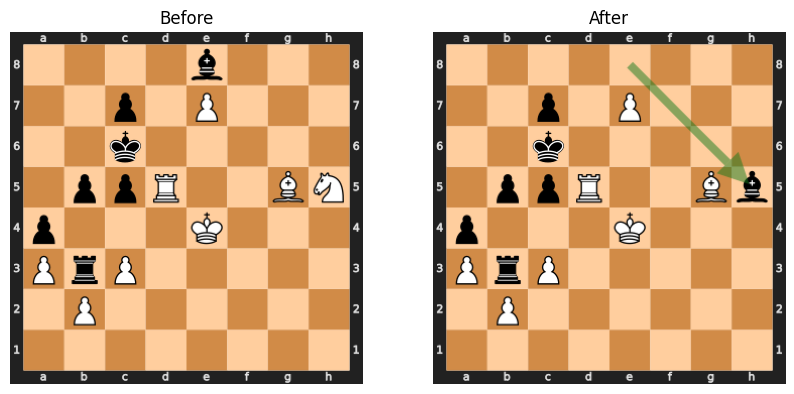

Evaluation for BLACK: +395
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.75     | 0.625    | -0.125 |         | 0.25     | 0.25     |  0         |
| king_centrality                  |         | 0        | 0        |  0     |         | 0.333333 | 0.333333 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.25     | 0.375    |  0.125 |         | 0.25     | 0.25     |  0         |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0     |         | 0.5      | 0.5      |  0         |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0

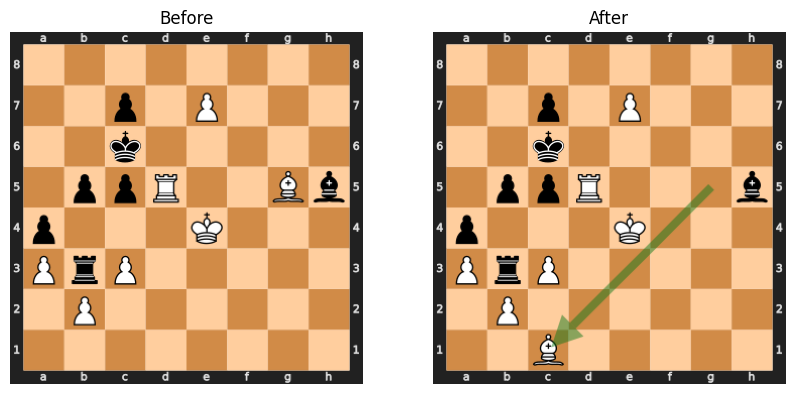

Evaluation for WHITE: -413
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.625    |  0         |         | 0.25     | 0.25     |      0 |
| king_centrality                  |         | 0        | 0        |  0         |         | 0.333333 | 0.333333 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.375    | 0.375    |  0         |         | 0.25     | 0.25     |      0 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0         |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        

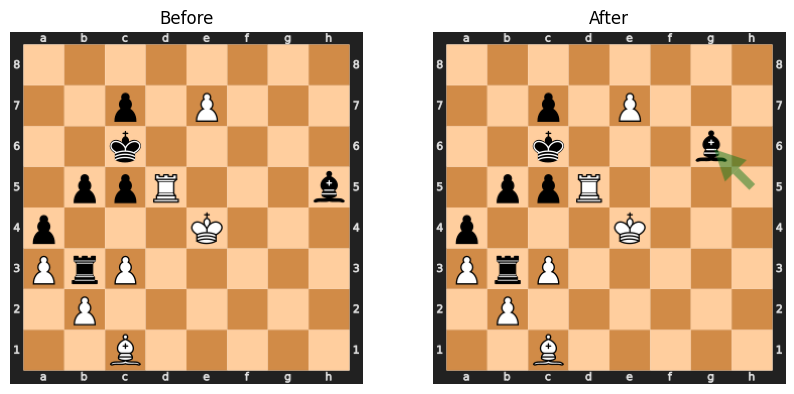

Evaluation for BLACK: +439
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.5      | -0.125 |         | 0.25     | 0.25     |      0 |
| king_centrality                  |         | 0        | 0        |  0     |         | 0.333333 | 0.333333 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.375    | 0.375    |  0     |         | 0.25     | 0.25     |      0 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0     |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0        | 1        |  1     |         | 0        | 0        |      0 |
| castling_rights    

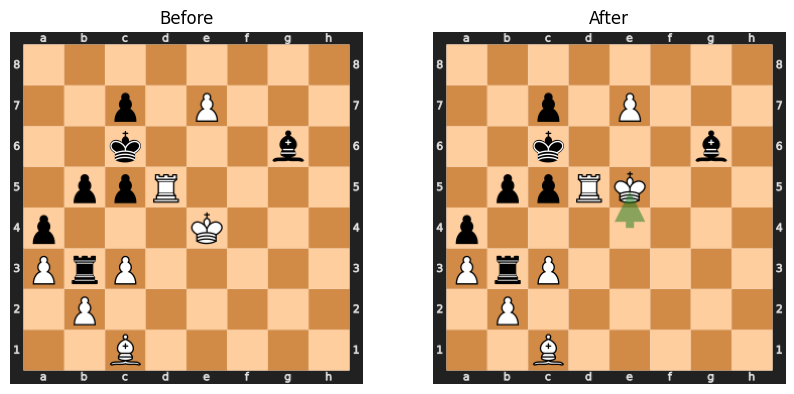

Evaluation for WHITE: -455
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.5      | 0.375    | -0.125     |         | 0.25     | 0.25     |      0 |
| king_centrality                  |         | 0        | 0        |  0         |         | 0.333333 | 0.333333 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.375    | 0.5      |  0.125     |         | 0.25     | 0.25     |      0 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0         |         | 0.5      | 0.5      |      0 |
| checked                          |         | 1        | 0        | -1         |         | 0        | 0        

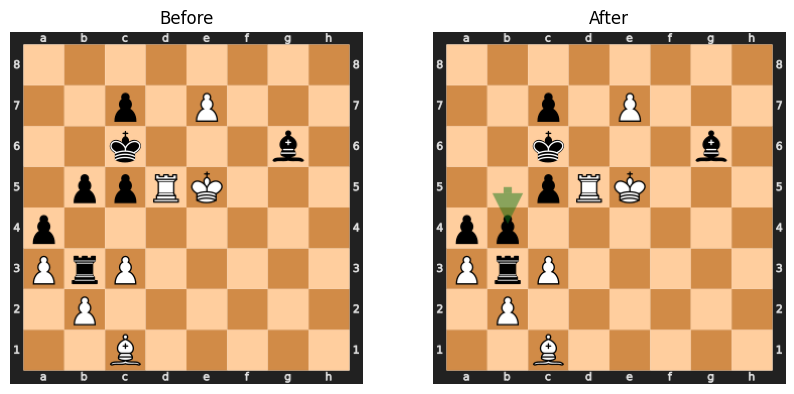

Evaluation for BLACK: +458
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.375    | 0.375    |  0     |         | 0.25     | 0.375    |  0.125     |
| king_centrality                  |         | 0        | 0        |  0     |         | 0.333333 | 0.333333 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.5      | 0.5      |  0     |         | 0.25     | 0.25     |  0         |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0     |         | 0.5      | 0.333333 | -0.166667  |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0

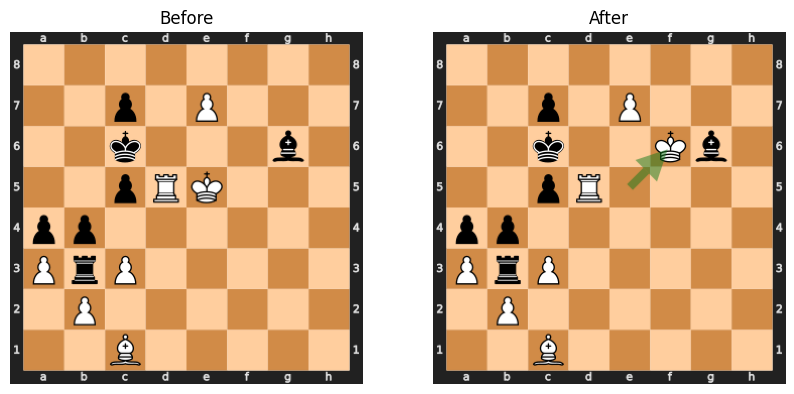

Evaluation for WHITE: -492
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+========+
| king_mobility                    |         | 0.375    | 0.625    |  0.25      |         | 0.375    | 0.5      |  0.125 |
| king_centrality                  |         | 0        | 0.333333 |  0.333333  |         | 0.333333 | 0.333333 |  0     |
| king_attackers_looking_at_ring_1 |         | 0.5      | 0.125    | -0.375     |         | 0.25     | 0.125    | -0.125 |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0         |         | 0.333333 | 0.333333 |  0     |
| checked                          |         | 0        | 0        |  0         |         | 0        | 0        

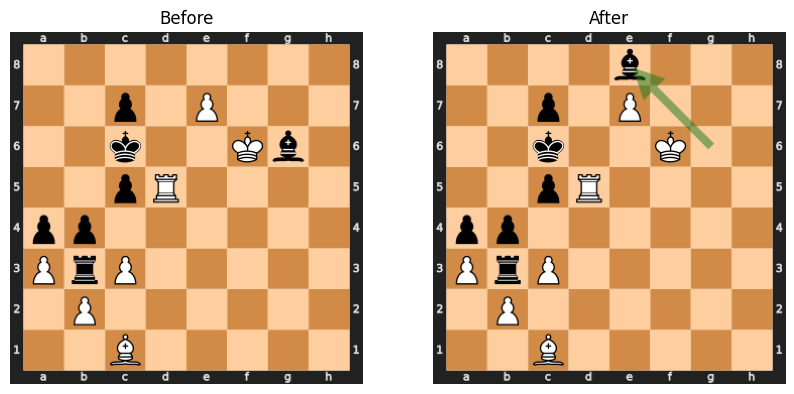

Evaluation for BLACK: +492
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.625    | 0.625    |  0     |         | 0.5      | 0.5      | 0         |
| king_centrality                  |         | 0.333333 | 0.333333 |  0     |         | 0.333333 | 0.333333 | 0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0     |         | 0.125    | 0.125    | 0         |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0     |         | 0.333333 | 0.333333 | 0         |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        | 0        

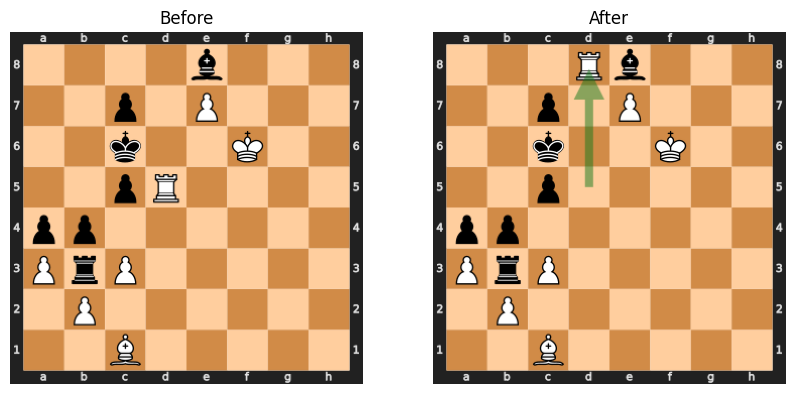

Evaluation for WHITE: -516
+----------------------------------+---------+----------+----------+-----------+---------+----------+----------+--------+
| Feature                          | WHITE   |   Before |    After |      Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+==========+==========+===========+=========+==========+==========+========+
| king_mobility                    |         | 0.625    | 0.625    | 0         |         | 0.5      | 0.375    | -0.125 |
| king_centrality                  |         | 0.333333 | 0.333333 | 0         |         | 0.333333 | 0.333333 |  0     |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    | 0         |         | 0.125    | 0.125    |  0     |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 | 0         |         | 0.333333 | 0.333333 |  0     |
| checked                          |         | 0        | 0        | 0         |         | 0        | 0        |  0    

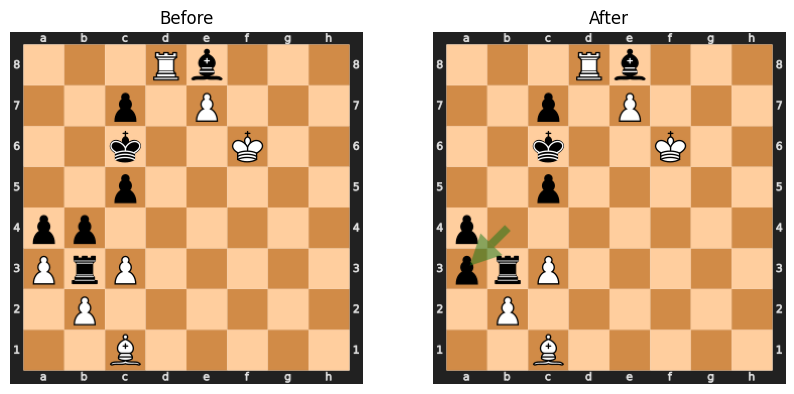

Evaluation for BLACK: +526
+----------------------------------+---------+----------+----------+------------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |       Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+============+=========+==========+==========+============+
| king_mobility                    |         | 0.625    | 0.625    |  0         |         | 0.375    | 0.375    |  0         |
| king_centrality                  |         | 0.333333 | 0.333333 |  0         |         | 0.333333 | 0.333333 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125    |  0         |         | 0.125    | 0.125    |  0         |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667 |  0         |         | 0.333333 | 0.333333 |  0         |
| checked                          |         | 0        | 0        |  0         |   

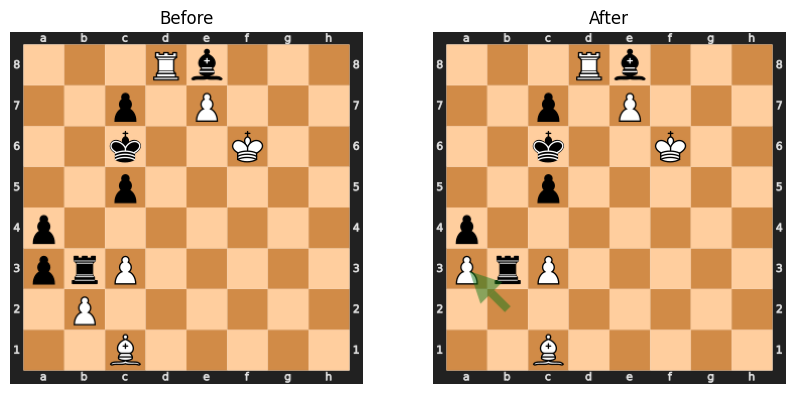

Evaluation for WHITE: -568
+----------------------------------+---------+----------+-----------+------------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |     After |       Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+===========+============+=========+==========+==========+============+
| king_mobility                    |         | 0.625    | 0.625     |  0         |         | 0.375    | 0.375    |  0         |
| king_centrality                  |         | 0.333333 | 0.333333  |  0         |         | 0.333333 | 0.333333 |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.125     |  0         |         | 0.125    | 0.125    |  0         |
| king_defenders_at_ring_1         |         | 0.166667 | 0.166667  |  0         |         | 0.333333 | 0.333333 |  0         |
| checked                          |         | 0        | 0         |  0     

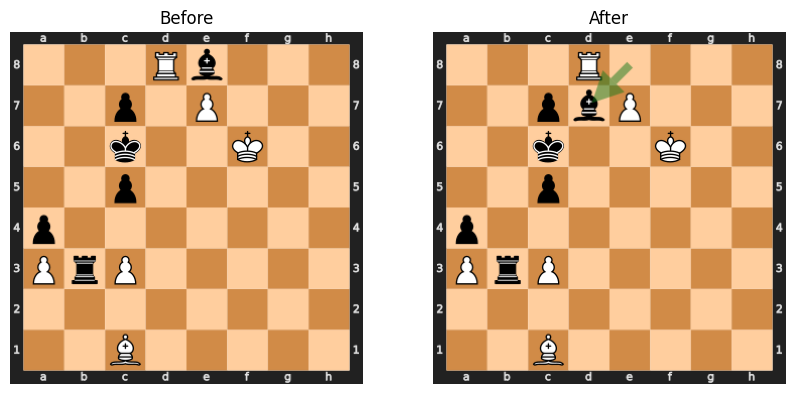

Evaluation for BLACK: +720
+----------------------------------+---------+-----------+-----------+--------+---------+----------+----------+-----------+
| Feature                          | WHITE   |    Before |     After |   Diff | BLACK   |   Before |    After |      Diff |
+==================================+=========+===========+===========+========+=========+==========+==========+===========+
| king_mobility                    |         | 0.625     | 0.625     |  0     |         | 0.375    | 0.625    | 0.25      |
| king_centrality                  |         | 0.333333  | 0.333333  |  0     |         | 0.333333 | 0.333333 | 0         |
| king_attackers_looking_at_ring_1 |         | 0.125     | 0.125     |  0     |         | 0.125    | 0.125    | 0         |
| king_defenders_at_ring_1         |         | 0.166667  | 0.166667  |  0     |         | 0.333333 | 0.5      | 0.166667  |
| checked                          |         | 0         | 0         |  0     |         | 0        | 0   

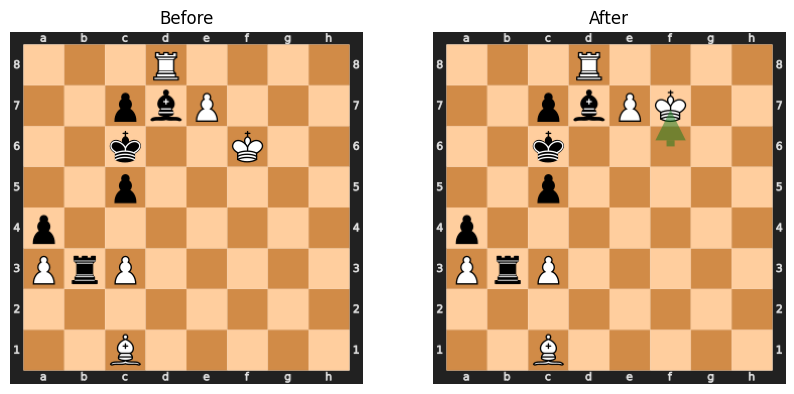

Evaluation for WHITE: -832
+----------------------------------+---------+-----------+-----------+----------+---------+----------+----------+--------+
| Feature                          | WHITE   |    Before |     After |     Diff | BLACK   |   Before |    After |   Diff |
+==================================+=========+===========+===========+==========+=========+==========+==========+========+
| king_mobility                    |         | 0.625     | 0.625     | 0        |         | 0.625    | 0.625    |      0 |
| king_centrality                  |         | 0.333333  | 0.666667  | 0.333333 |         | 0.333333 | 0.333333 |      0 |
| king_attackers_looking_at_ring_1 |         | 0.125     | 0.125     | 0        |         | 0.125    | 0.125    |      0 |
| king_defenders_at_ring_1         |         | 0.166667  | 0.166667  | 0        |         | 0.5      | 0.5      |      0 |
| checked                          |         | 0         | 0         | 0        |         | 0        | 0        

In [21]:
game.simulate_game(display_board=True, print_evaluation=True, n_moves=155)

Move #82 for BLACK: e7e3


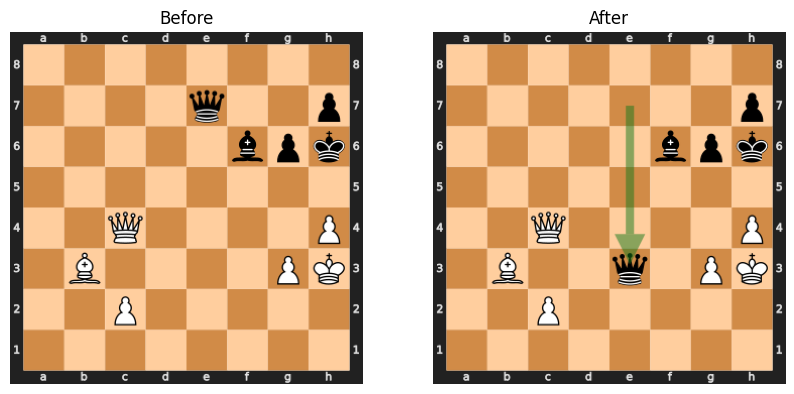

Evaluation for BLACK: +9
+----------------------------------+---------+----------+----------+--------+---------+----------+----------+------------+
| Feature                          | WHITE   |   Before |    After |   Diff | BLACK   |   Before |    After |       Diff |
+==================================+=========+==========+==========+========+=========+==========+==========+============+
| king_mobility                    |         | 0.375    | 0.375    |  0     |         | 0.25     | 0.25     |  0         |
| king_centrality                  |         | 1        | 1        |  0     |         | 1        | 1        |  0         |
| king_attackers_looking_at_ring_1 |         | 0.125    | 0.25     |  0.125 |         | 0.125    | 0.125    |  0         |
| king_defenders_at_ring_1         |         | 0.333333 | 0.333333 |  0     |         | 0.333333 | 0.333333 |  0         |
| checked                          |         | 0        | 0        |  0     |         | 0        | 0        |  0  

In [13]:
move = game.get_nth_move(82, display_board=True, print_evaluation=True)